In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 4)

# Data description

# Load data & preview

In [3]:
data = pd.read_csv('C:\\Users\\BEST BUY\\Downloads\\CWC23_all_innings.csv')
data.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.7500,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.7500,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.8000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.8167,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.8167,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

# Exploring the data

# Checking for duplicates

In [5]:
data.duplicated().sum()

2

In [6]:
data[data.duplicated(keep=False)]

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
1234,ENG,AAP Atkinson (ENG),bat,1,0,NaN,1.0,0.0,v Pakistan,Eden Gardens,11-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,1.0
1235,PAK,Abdullah Shafique (PAK),bat,2,0,NaN,0.5,0.0,v England,Eden Gardens,11-Nov-23,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,2.0
1314,ENG,AAP Atkinson (ENG),bat,1,0,NaN,1.0,0.0,v Pakistan,Eden Gardens,11-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,1.0
1315,PAK,Abdullah Shafique (PAK),bat,2,0,NaN,0.5,0.0,v England,Eden Gardens,11-Nov-23,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,2.0


### A player shouldn't appear twice in the same match with the same data
### so duplicates must be dropped to have precision

In [7]:
data = data.drop_duplicates()
data.duplicated().sum()

0

# Checking for missing values

In [8]:
data.isna().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               844
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              844
mdns               844
econ               844
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

# Numeric features descriptive stats

In [9]:
data.describe().to_csv('numeric_data_descriptive_stats')
data.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1406.0000,1406.0000,562.0000,1406.0000,1406.0000,562.0000,562.0000,562.0000,1406.0000,844.0000,844.0000,844.0000,844.0000,844.0000
mean,35.3535,33.2845,1.2046,0.0696,0.9000,7.3425,0.2562,5.9466,1.4708,2.6114,0.7536,83.9150,0.1517,42.8187
std,25.2344,28.0482,1.1982,0.1502,0.4702,2.6797,0.5325,2.1416,0.4993,3.1481,1.5055,52.3788,0.3589,41.5776
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.3000,0.0000,1.3500,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,14.0000,11.0000,0.0000,0.0107,0.6250,5.5500,0.0000,4.5000,1.0000,0.0000,0.0000,51.9025,0.0000,12.0000
50%,32.0000,29.0000,1.0000,0.0323,0.8797,8.0000,0.0000,5.6750,1.0000,2.0000,0.0000,81.9300,0.0000,28.0000
75%,54.0000,49.0000,2.0000,0.0622,1.1317,10.0000,0.0000,7.1200,2.0000,4.0000,1.0000,107.1400,0.0000,60.2500
max,143.0000,201.0000,7.0000,1.0000,6.0000,10.0000,3.0000,16.0000,2.0000,21.0000,11.0000,600.0000,1.0000,217.0000


In [10]:
# Unique values of each feature
for column in data.columns:
    print(f"\nColumn: {column}")
    print(data[column].value_counts())


Column: team
team
NED    157
AUS    155
ENG    150
NZ     144
BAN    141
SA     141
SL     138
AFG    129
PAK    127
IND    124
Name: count, dtype: int64

Column: player
player
R Ravindra (NZ)       19
GD Phillips (NZ)      19
CN Ackermann (NED)    18
PJ Cummins (AUS)      18
A Dutt (NED)          18
                      ..
AT Carey (AUS)         1
IS Sodhi (NZ)          1
LB Williams (SA)       1
R Ashwin (IND)         1
SA Yadav(IND)          1
Name: count, Length: 152, dtype: int64

Column: bat_or_bowl
bat_or_bowl
bat     844
bowl    562
Name: count, dtype: int64

Column: bb_bf
bb_bf
60     170
54      65
48      61
42      56
24      48
      ... 
104      1
91       1
88       1
95       1
119      1
Name: count, Length: 117, dtype: int64

Column: runs
runs
0      63
1      44
2      36
4      34
11     31
       ..
122     1
123     1
126     1
129     1
105     1
Name: count, Length: 128, dtype: int64

Column: wkts
wkts
0.0    201
1.0    155
2.0    130
3.0     51
4.0     18
5.

# Team stats

In [11]:
 team_performance = data.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': lambda x: x.mode().iloc[0],  # Mode to identify predominant style
})

team_performance['avg_runs_per_match'] = team_performance['runs'] / data.groupby('team')['start_date'].nunique()
team_performance['avg_wkts_per_match'] = team_performance['wkts'] / data.groupby('team')['start_date'].nunique()
team_performance.to_csv('team_performance.csv')
team_performance

,runs,wkts,bat_or_bowl,avg_runs_per_match,avg_wkts_per_match
team,,,,,
AFG,4134,53.0,bat,459.3333,5.8889
AUS,5234,77.0,bat,523.4000,7.7000
BAN,4358,51.0,bat,484.2222,5.6667
ENG,4396,65.0,bat,488.4444,7.2222
IND,4783,94.0,bat,478.3000,9.4000
NED,4268,63.0,bat,474.2222,7.0000
NZ,5376,71.0,bat,537.6000,7.1000
PAK,4786,65.0,bat,531.7778,7.2222
SA,5097,88.0,bat,509.7000,8.8000


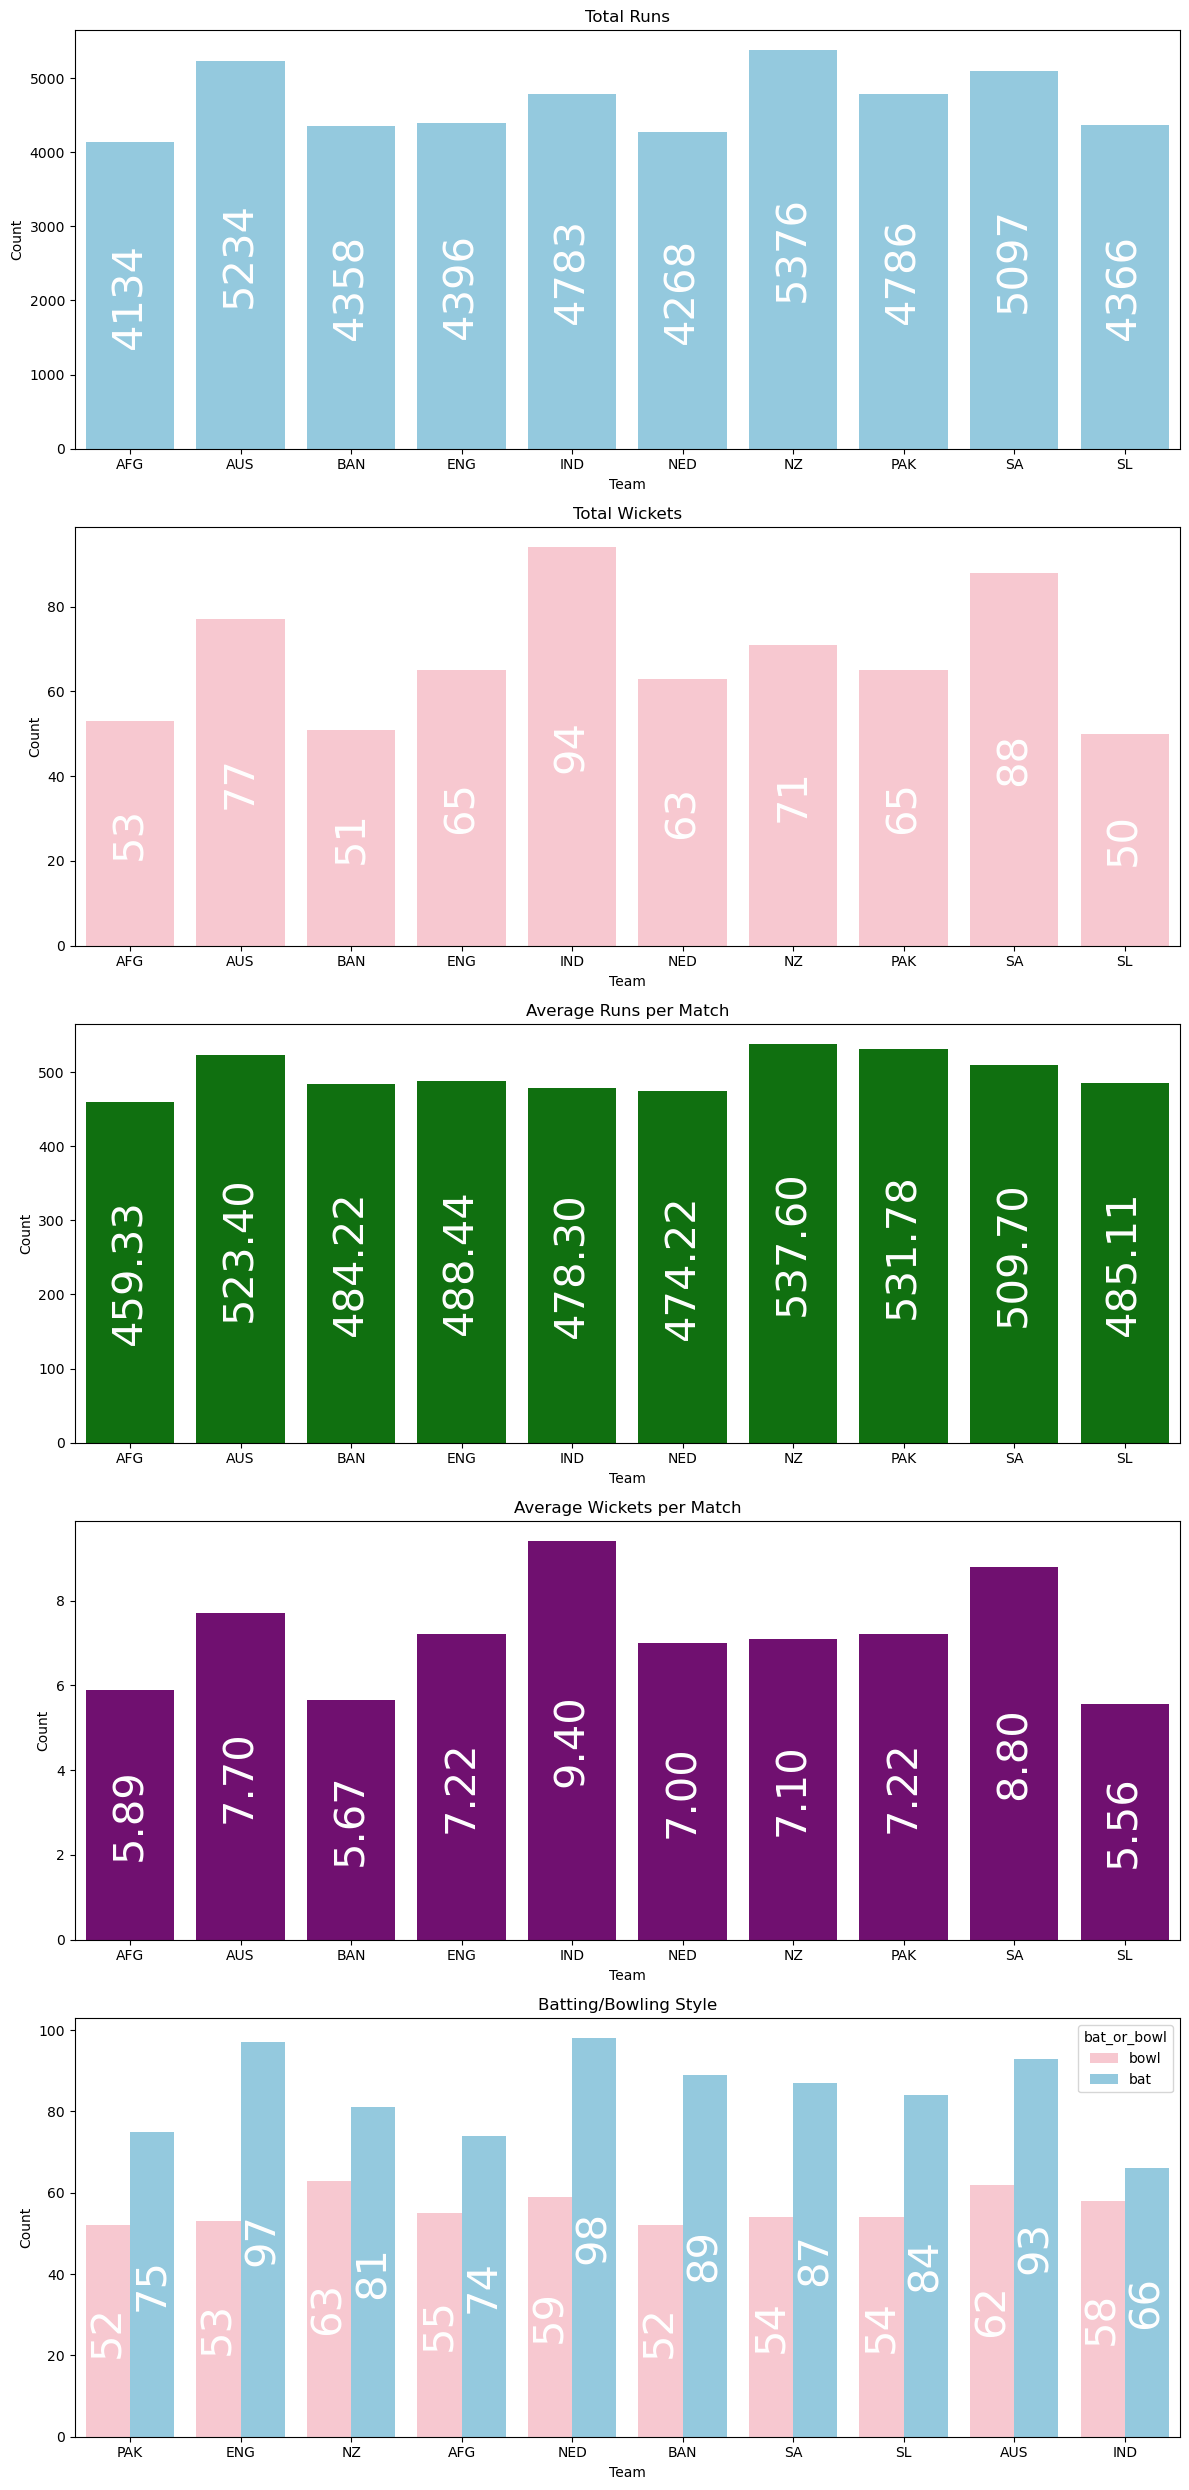

In [23]:
# Font size settings for each subplot
font_sizes = {'Total Runs': 30, 'Total Wickets': 30, 'Average Runs per Match': 30, 'Average Wickets per Match': 30, 'Batting/Bowling Style': 30}

# Visualize team-wise performance using subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 25))

# Subplot 1: Total Runs
sns.barplot(x=team_performance.index, y='runs', data=team_performance, color='skyblue', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() /2 ), ha='center', va='center', color='white', fontsize=font_sizes['Total Runs'],  rotation=90)

axes[0].set_title('Total Runs')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Count')

# Subplot 2: Total Wickets
sns.barplot(x=team_performance.index, y='wkts', data=team_performance, color='pink', ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center', color='white', fontsize=font_sizes['Total Wickets'], rotation=90)

axes[1].set_title('Total Wickets')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Count')

# Subplot 3: Average Runs per Match
sns.barplot(x=team_performance.index, y='avg_runs_per_match', data=team_performance, color='green', ax=axes[2])
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()/ 2), ha='center', va='center', color='white', fontsize=font_sizes['Average Runs per Match'], rotation=90)

axes[2].set_title('Average Runs per Match')
axes[2].set_xlabel('Team')
axes[2].set_ylabel('Count')

# Subplot 4: Average Wickets per Match
sns.barplot(x=team_performance.index, y='avg_wkts_per_match', data=team_performance, color='purple', ax=axes[3])
for p in axes[3].patches:
    axes[3].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center', color='white', fontsize=font_sizes['Average Wickets per Match'], rotation=90)

axes[3].set_title('Average Wickets per Match')
axes[3].set_xlabel('Team')
axes[3].set_ylabel('Count')

# Subplot 5: Batting/Bowling Style
sns.countplot(x='team', data=data, hue='bat_or_bowl', ax=axes[4], palette={'bat': 'skyblue', 'bowl': 'pink'})
for p in axes[4].patches:
    axes[4].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center', color='white', fontsize=font_sizes['Batting/Bowling Style'], rotation=90)

    axes[4].set_title('Batting/Bowling Style')
axes[4].set_xlabel('Team')
axes[4].set_ylabel('Count')

plt.tight_layout()
plt.savefig('Team-performance.png', dpi=900)
plt.show()

In [15]:
# Best performing team for each metric
print("Best Performing Team for Each Metric:")
print("..............................................")
print("Total Runs:", team_performance['runs'].idxmax())
print("Total Wickets:", team_performance['wkts'].idxmax())
print("Average Runs per Match:", team_performance['avg_runs_per_match'].idxmax())
print("Average Wickets per Match:", team_performance['avg_wkts_per_match'].idxmax())
print("\nDominant Batting/Bowling Style for Each Team:")
print("...............................................")
for team, style in data.groupby(['team', 'bat_or_bowl']).size().unstack().idxmax(axis=1).items():
    print(f"{team}: {style}")

Best Performing Team for Each Metric:
..............................................
Total Runs: NZ
Total Wickets: IND
Average Runs per Match: NZ
Average Wickets per Match: IND

Dominant Batting/Bowling Style for Each Team:
...............................................
AFG: bat
AUS: bat
BAN: bat
ENG: bat
IND: bat
NED: bat
NZ: bat
PAK: bat
SA: bat
SL: bat


# Player Performance Analysis

In [16]:
len(data['player'].unique())

152

In [17]:
# Separate Batting and Bowling Data
batting_data = data[data['bat_or_bowl'] == 'bat']
bowling_data = data[data['bat_or_bowl'] == 'bowl']
batting_players = batting_data.groupby('player').agg({
    'runs': 'sum',
    'bb_bf': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',
    'not_out': 'sum',
    'mins': 'mean'
})

bowling_players = bowling_data.groupby('player').agg({
    'wkts': 'sum',
    'bb_bf': 'sum',
    'mdns': 'sum',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',
    'mins': 'mean'
})

In [18]:
# Merge batting and bowling 
player_stats = pd.merge(batting_players, bowling_players, on='player', how='outer', suffixes=('_batting', '_bowling'))

# Total stats
player_stats['total_runs'] = player_stats['runs'] + player_stats['wkts']
player_stats = player_stats.sort_values(by='total_runs', ascending=False).reset_index()

player_stats.to_csv('player_stats.csv')
player_stats

,player,runs,bb_bf_batting,4s_batting,6s_batting,sr_batting,not_out,mins_batting,wkts,bb_bf_bowling,mdns,econ,4s_bowling,6s_bowling,sr_bowling,mins_bowling,total_runs
0,V Kohli (IND),711.0,784.0,64.0,9.0,82.9560,3.0,109.7000,1.0,21.0,0.0,4.1650,0.0,0.0,NaN,NaN,712.0
1,R Ravindra (NZ),578.0,543.0,55.0,17.0,94.5670,1.0,87.2000,5.0,394.0,0.0,6.2433,0.0,0.0,NaN,NaN,583.0
2,DJ Mitchell (NZ),552.0,497.0,48.0,22.0,105.5422,1.0,80.4444,0.0,9.0,0.0,6.5000,0.0,0.0,NaN,NaN,552.0
3,RG Sharma (IND),550.0,443.0,62.0,28.0,125.5260,0.0,61.7000,1.0,5.0,0.0,8.4000,0.0,0.0,NaN,NaN,551.0
4,MR Marsh (AUS),426.0,395.0,42.0,20.0,82.6111,1.0,58.6667,2.0,66.0,0.0,7.9375,0.0,0.0,NaN,NaN,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,LB Williams (SA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,52.0,1.0,6.4600,0.0,0.0,NaN,NaN,NaN
148,Mohammed Siraj (IND),NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,453.0,6.0,5.3210,0.0,0.0,NaN,NaN,NaN
149,R Ashwin (IND),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60.0,1.0,3.4000,0.0,0.0,NaN,NaN,NaN
150,SA Abbott (AUS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,60.0,0.0,6.1000,0.0,0.0,NaN,NaN,NaN


In [19]:
# Lead run scorers - batting players
leading_run_scorers = batting_players.sort_values(by='runs', ascending=False)
leading_run_scorers.to_csv('leading_run_scorers_batting_players.csv')
leading_run_scorers.head(10)

,runs,bb_bf,4s,6s,sr,not_out,mins
player,,,,,,,
V Kohli (IND),711,784,64.0,9.0,82.9560,3.0,109.7000
Q de Kock (SA),594,555,57.0,21.0,106.5390,0.0,79.9000
R Ravindra (NZ),578,543,55.0,17.0,94.5670,1.0,87.2000
DJ Mitchell (NZ),552,497,48.0,22.0,105.5422,1.0,80.4444
RG Sharma (IND),550,443,62.0,28.0,125.5260,0.0,61.7000
DA Warner (AUS),528,491,49.0,24.0,108.1990,0.0,75.8000
SS Iyer (IND),526,465,36.0,24.0,93.0050,3.0,64.8000
HE van der Dussen (SA),448,530,39.0,8.0,66.1140,1.0,79.4000
MR Marsh (AUS),426,395,42.0,20.0,82.6111,1.0,58.6667


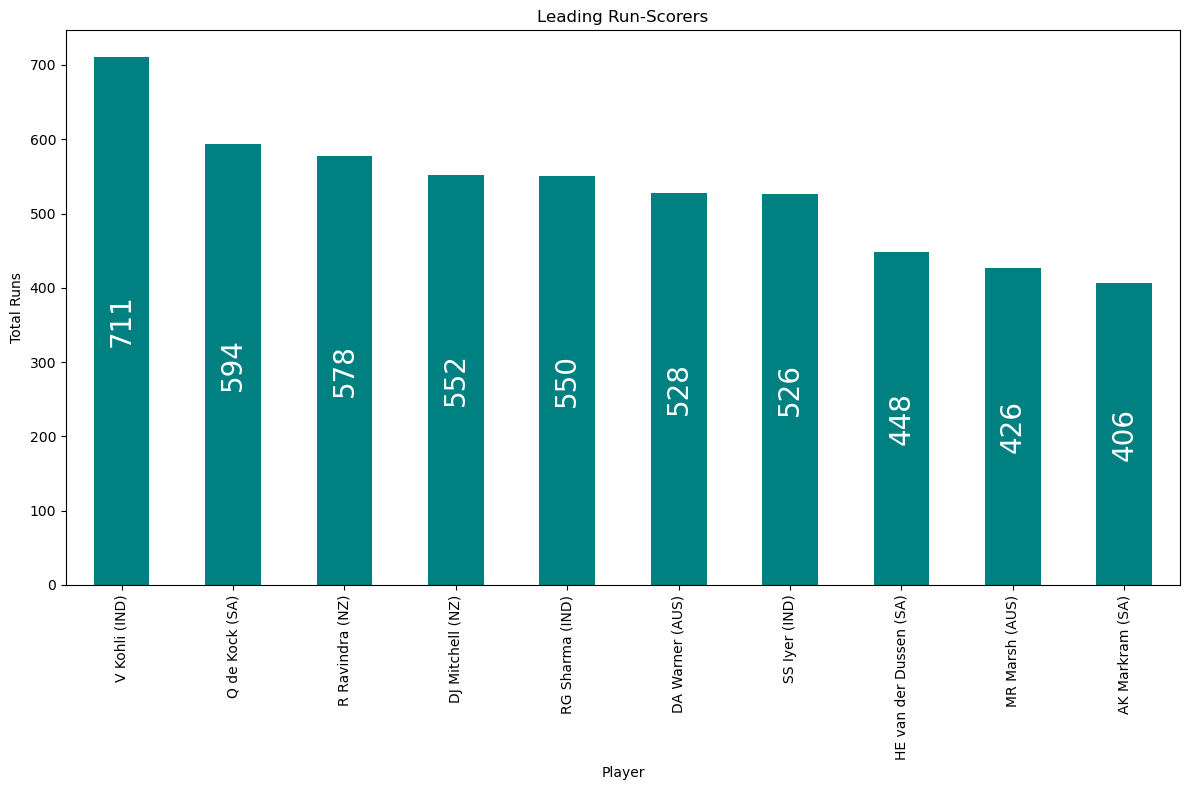

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 8))  # Adjust the values (width, height) as needed
ax1 = leading_run_scorers['runs'].head(10).plot(kind='bar', title='Leading Run-Scorers', color='teal')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() /2 ), ha='center', va='center', color='white', fontsize=20,  rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.savefig('top_10_leading_run_scorers_batting.png', dpi=900)
plt.show()

In [25]:
#Best performing batting player in each metric
print("Best Performing Batting Players")
print("-------------------------------------")
for column in batting_players.columns:
    max_player = batting_players.sort_values(by=column, ascending=False).head(1).index[0]
    max_value = batting_players.sort_values(by=column, ascending=False).head(1)[column][0]
    print(f"\nHighest {column}: {max_player} ({max_value})")

Best Performing Batting Players
-------------------------------------

Highest runs: V Kohli (IND) (711)

Highest bb_bf: V Kohli (IND) (784)

Highest 4s: V Kohli (IND) (64.0)

Highest 6s: RG Sharma (IND) (28.0)

Highest sr: DJ Willey (ENG) (163.93333333333334)

Highest not_out: Shoriful Islam (BAN) (4.0)

Highest mins: V Kohli (IND) (109.7)


C:\Users\BEST BUY\AppData\Local\Temp\ipykernel_31380\87119722.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_value = batting_players.sort_values(by=column, ascending=False).head(1)[column][0]


In [26]:
#Lead wichet takers - bowling players
leading_wicket_takers = bowling_players.sort_values(by='wkts', ascending=False)
leading_wicket_takers.to_csv("leading_wicket_takers_bowling.csv")
leading_wicket_takers.head(10)

,wkts,bb_bf,mdns,econ,4s,6s,sr,mins
player,,,,,,,,
Mohammed Shami (IND),23.0,251,3.0,4.8767,0.0,0.0,NaN,NaN
A Zampa (AUS),22.0,516,1.0,5.3800,0.0,0.0,NaN,NaN
D Madushanka (SL),21.0,470,4.0,6.7867,0.0,0.0,NaN,NaN
G Coetzee (SA),20.0,381,1.0,6.4425,0.0,0.0,NaN,NaN
JJ Bumrah (IND),18.0,497,7.0,3.7850,0.0,0.0,NaN,NaN
Shaheen Shah Afridi (PAK),18.0,486,3.0,5.8956,0.0,0.0,NaN,NaN
M Jansen (SA),17.0,414,3.0,6.5089,0.0,0.0,NaN,NaN
MJ Santner (NZ),16.0,556,4.0,4.9580,0.0,0.0,NaN,NaN
Haris Rauf (PAK),16.0,474,1.0,6.7689,0.0,0.0,NaN,NaN


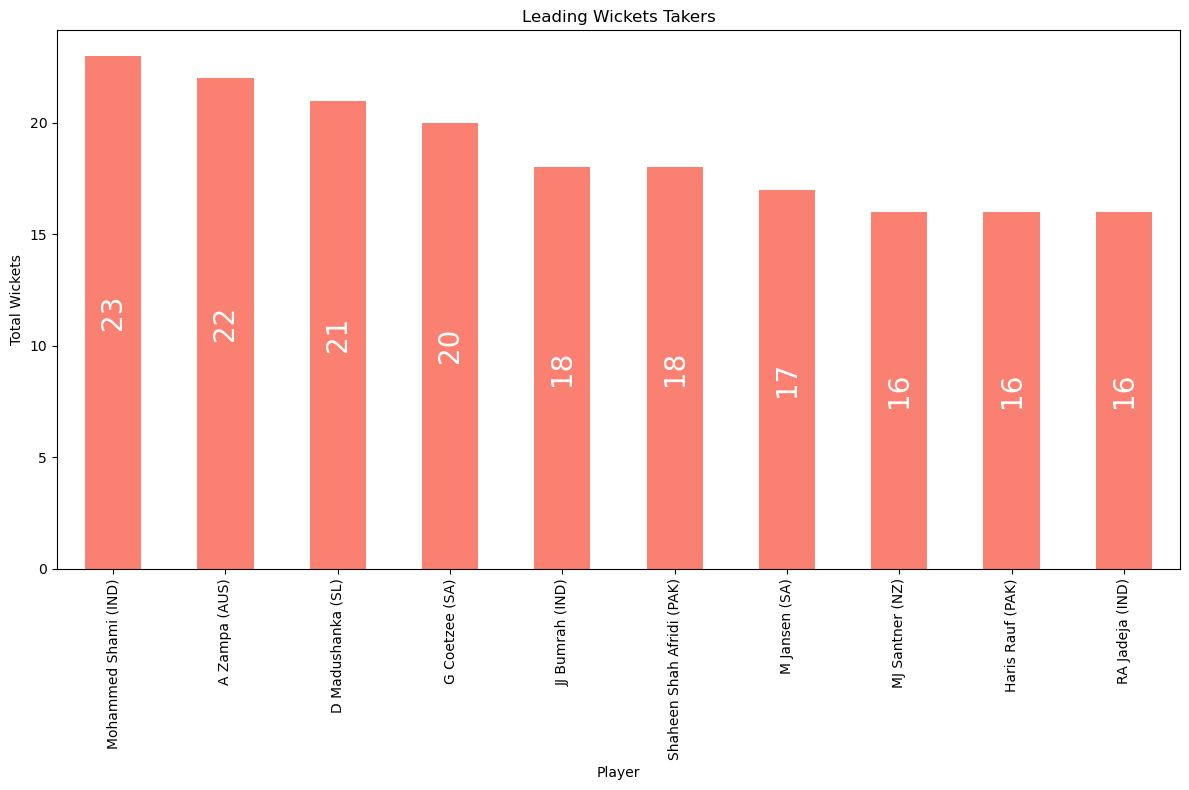

In [27]:
fig, ax2 = plt.subplots(figsize=(12, 8))  # Adjust the values (width, height) as needed
ax2 = leading_wicket_takers['wkts'].head(10).plot(kind='bar', title='Leading Wickets Takers', color='salmon')

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() /2 ), ha='center', va='center', color='white', fontsize=20,  rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.tight_layout()
plt.savefig('top_10_leading_wickets_takers_bowling.png', dpi=900)
plt.show()

In [28]:
#Best performing bowling player in each metric
print("Best Performing Bowling Players")
print("-------------------------------------")
for column in bowling_players.columns:
    max_player = bowling_players.sort_values(by=column, ascending=False).head(1).index[0]
    max_value = bowling_players.sort_values(by=column, ascending=False).head(1)[column][0]
    print(f"\nHighest {column}: {max_player} ({max_value})")

Best Performing Bowling Players
-------------------------------------

Highest wkts: Mohammed Shami (IND) (23.0)

Highest bb_bf: MJ Santner (NZ) (556)

Highest mdns: JR Hazlewood (AUS) (8.0)

Highest econ: JDS Neesham (NZ) (12.18)

Highest 4s: A Dutt (NED) (0.0)

Highest 6s: A Dutt (NED) (0.0)

Highest sr: A Dutt (NED) (nan)

Highest mins: A Dutt (NED) (nan)


C:\Users\BEST BUY\AppData\Local\Temp\ipykernel_31380\3057723341.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_value = bowling_players.sort_values(by=column, ascending=False).head(1)[column][0]


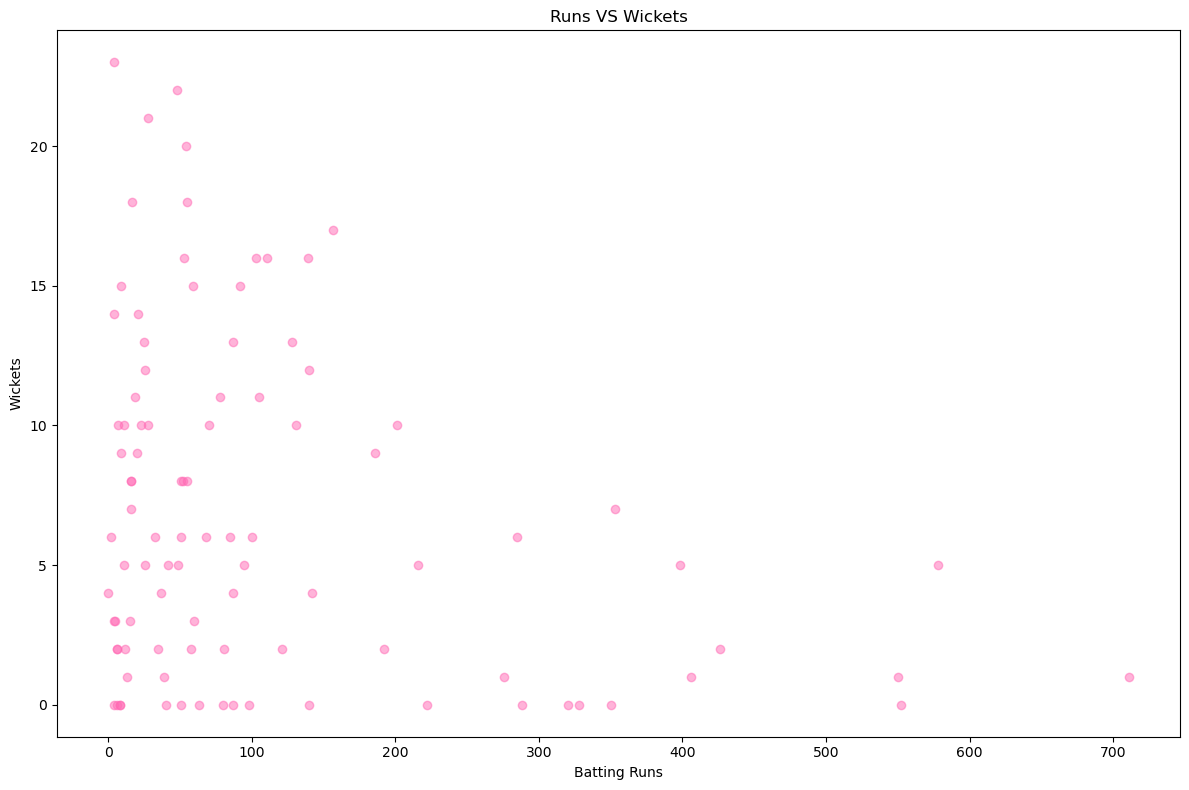

In [29]:
# Runs VS Wickets

fig, ax2 = plt.subplots(figsize=(12, 8))  
plt.scatter(player_stats['runs'], player_stats['wkts'], color='hotpink', alpha=0.5 )
plt.title('Runs VS Wickets')
plt.xlabel('Batting Runs')
plt.ylabel('Wickets')
plt.tight_layout()
plt.savefig('runs_VS_wickets.png', dpi=900)
plt.show()

In [30]:
#Team performance against different opposition
team_opposition_stats = data.groupby(['team','opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
team_opposition_stats.to_csv('team_opposition_stats.csv')
team_opposition_stats

,team,opposition,runs,wkts
0,AFG,v Australia,563,6.0
1,AFG,v Bangladesh,303,3.0
2,AFG,v England,480,10.0
3,AFG,v India,525,2.0
4,AFG,v Netherlands,346,6.0
...,...,...,...,...
86,SL,v India,391,6.0
87,SL,v Netherlands,495,9.0
88,SL,v New Zealand,339,4.0
89,SL,v Pakistan,675,4.0


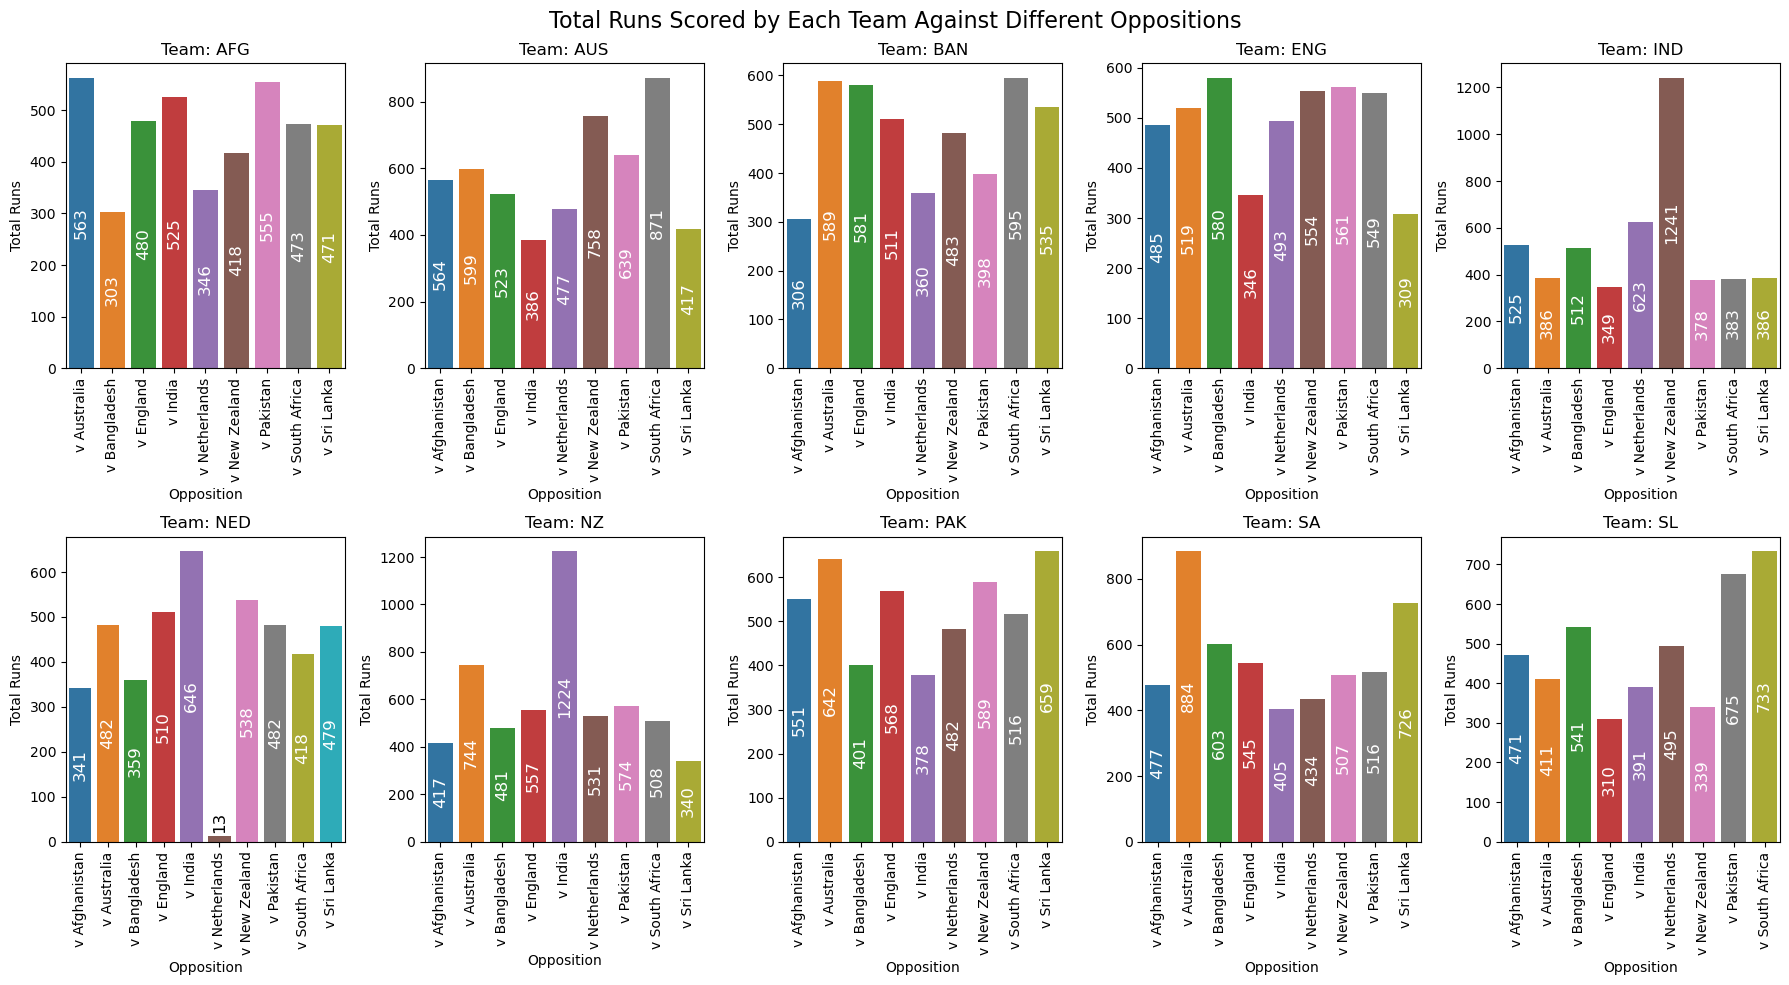

In [31]:
# Total runs of each team VS different oppositions
unique_teams = team_opposition_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Each Team Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    team_data = team_opposition_stats[team_opposition_stats['team'] == team]
    ax = sns.barplot(x='opposition', y='runs', data=team_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.2 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_each_team_VS_each_opposition.png', dpi=1500)
plt.show()

In [32]:
#Opposition against which each team scored his highest runs
def get_max_rows(group, col):
    max_value = group[col].max()
    return group[group[col] == max_value]
max_team_runs_df = team_opposition_stats.groupby('team').apply(lambda x: get_max_rows(x, 'runs'))

# Reset index for better representation
max_team_runs_df.reset_index(drop=True, inplace=True)
max_team_runs_df.drop('wkts', axis=1, inplace=True)
# Display the resulting DataFrame for maximum runs
max_team_runs_df.to_csv('Opposition against which each team scored his highest runs.csv')
max_team_runs_df

,team,opposition,runs
0,AFG,v Australia,563
1,AUS,v South Africa,871
2,BAN,v South Africa,595
3,ENG,v Bangladesh,580
4,IND,v New Zealand,1241
5,NED,v India,646
6,NZ,v India,1224
7,PAK,v Sri Lanka,659
8,SA,v Australia,884
9,SL,v South Africa,733


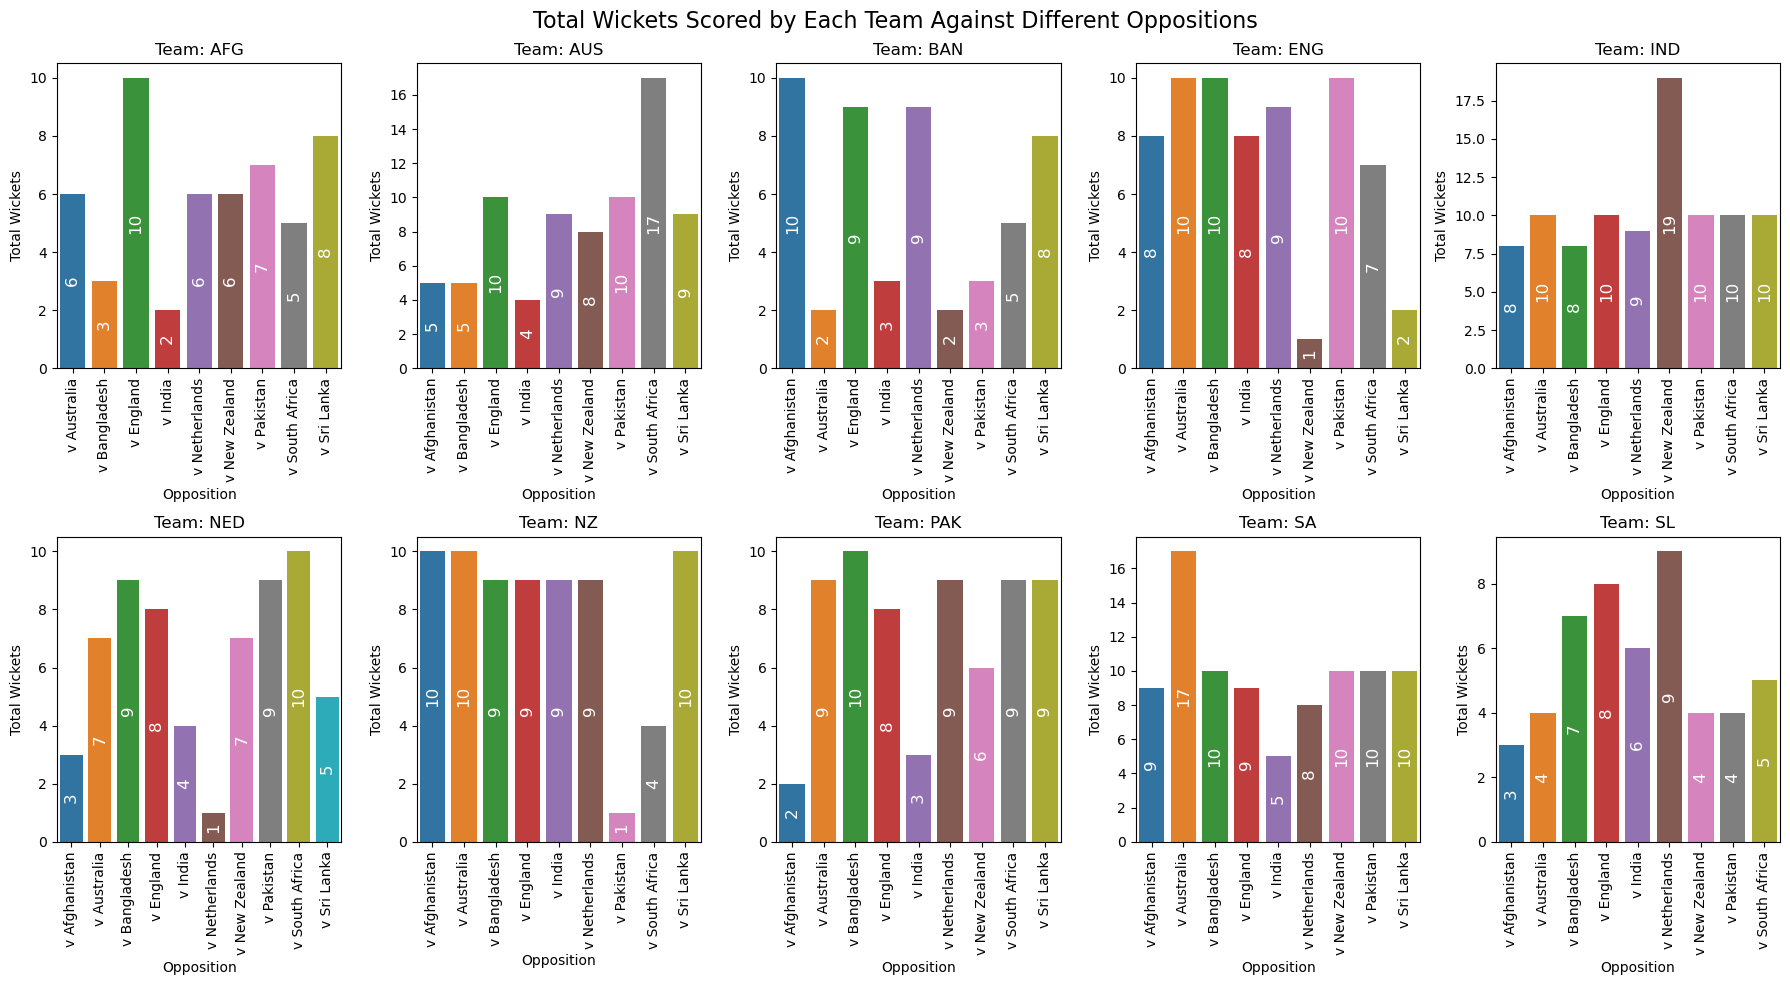

In [35]:
unique_teams = team_opposition_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Each Team Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    team_data = team_opposition_stats[team_opposition_stats['team'] == team]
    ax = sns.barplot(x='opposition', y='wkts', data=team_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.05 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_each_team_VS_each_opposition.png', dpi=1500)
plt.show()

In [36]:
#Opposition against which each team scored his highest wickets
max_team_wkts_df = team_opposition_stats.groupby('team').apply(lambda x: get_max_rows(x, 'wkts'))
max_team_wkts_df.reset_index(drop=True, inplace=True)
max_team_wkts_df.drop('runs', axis=1, inplace=True)
max_team_wkts_df.to_csv('Opposition against which each team scored his highest wkts.csv')
max_team_wkts_df

,team,opposition,wkts
0,AFG,v England,10.0
1,AUS,v South Africa,17.0
2,BAN,v Afghanistan,10.0
3,ENG,v Australia,10.0
4,ENG,v Bangladesh,10.0
5,ENG,v Pakistan,10.0
6,IND,v New Zealand,19.0
7,NED,v South Africa,10.0
8,NZ,v Afghanistan,10.0
9,NZ,v Australia,10.0


In [37]:
#Players performance (batting, bowling) against different oppositions
player_opposition_stats = data.groupby(['player','opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
player_opposition_stats.to_csv('player_opposition_stats.csv')
player_opposition_stats

,player,opposition,runs,wkts
0,A Dutt (NED),v Afghanistan,59,0.0
1,A Dutt (NED),v Australia,60,1.0
2,A Dutt (NED),v Bangladesh,35,1.0
3,A Dutt (NED),v England,68,2.0
4,A Dutt (NED),v India,57,0.0
...,...,...,...,...
973,WA Young (NZ),v Australia,32,0.0
974,WA Young (NZ),v England,0,0.0
975,WA Young (NZ),v India,17,0.0
976,WA Young (NZ),v Netherlands,70,0.0


In [38]:
leading_run_scorers.head(10).index

Index(['V Kohli (IND)', 'Q de Kock (SA)', 'R Ravindra (NZ)',
       'DJ Mitchell (NZ)', 'RG Sharma (IND)', 'DA Warner (AUS)',
       'SS Iyer (IND)', 'HE van der Dussen (SA)', 'MR Marsh (AUS)',
       'AK Markram (SA)'],
      dtype='object', name='player')

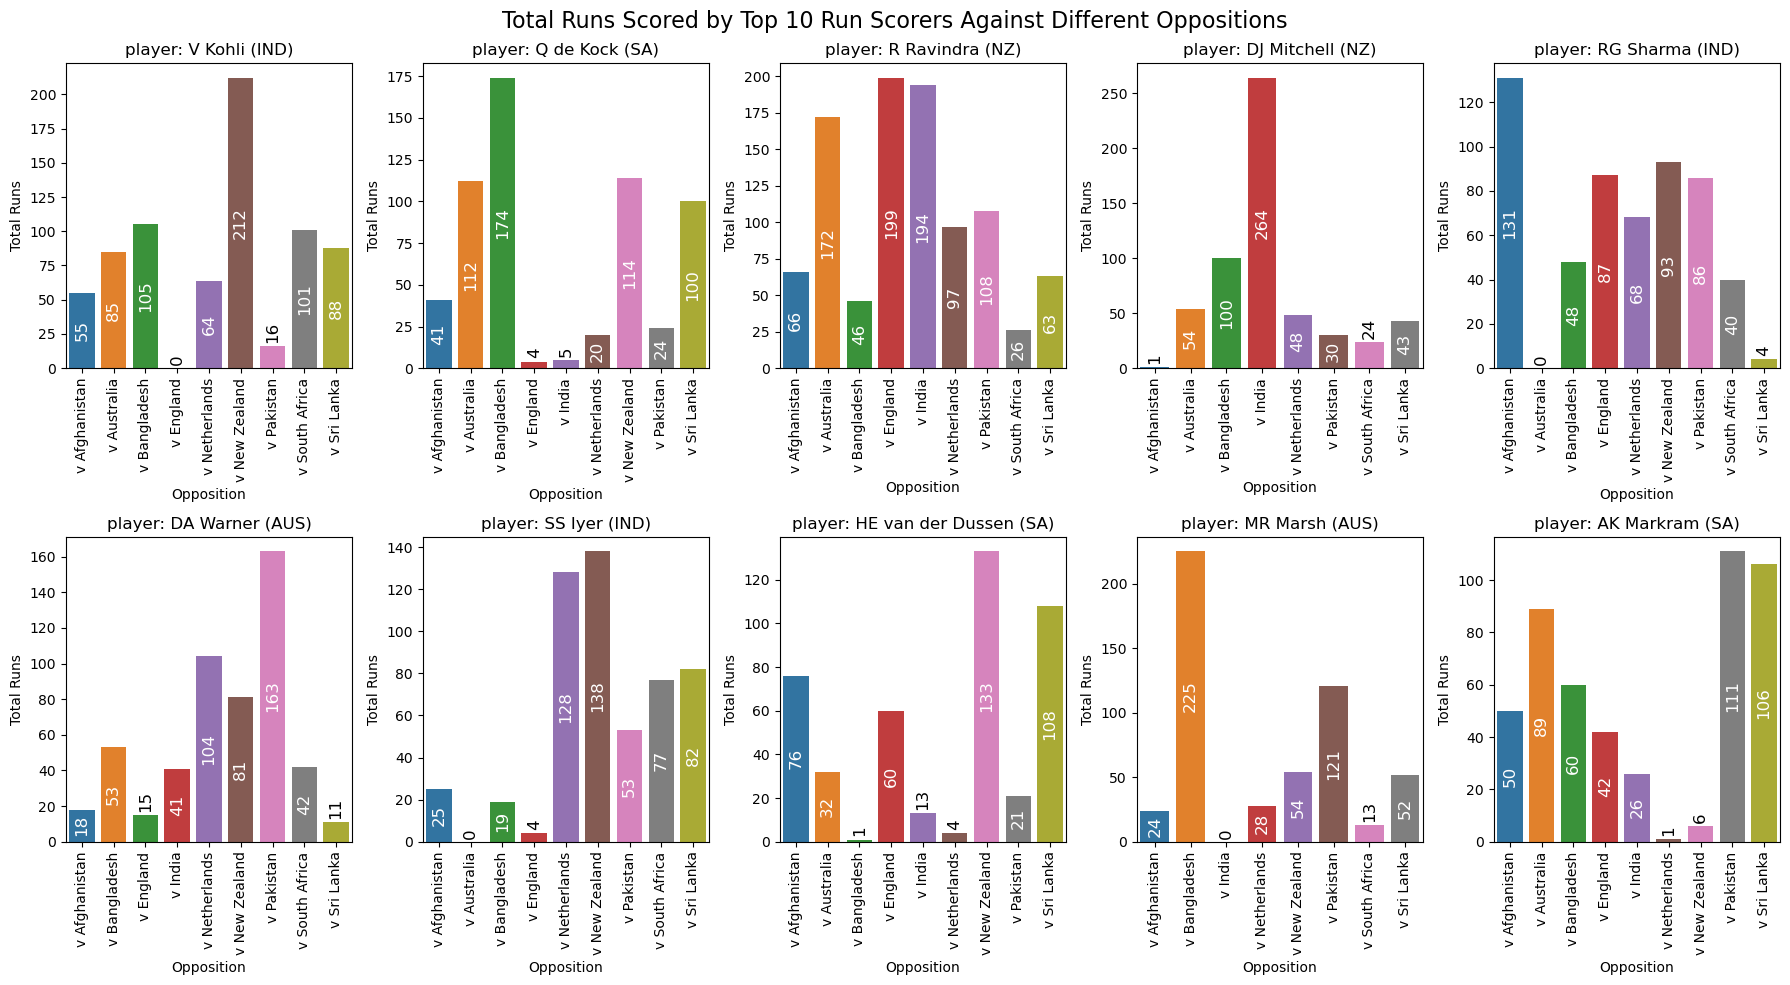

In [39]:
# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Top 10 Run Scorers Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_run_scorers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_opposition_stats[player_opposition_stats['player'] == player]
    ax = sns.barplot(x='opposition', y='runs', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_top_10_run_scorers_VS_each_opposition.png', dpi=1500)
plt.show()

In [40]:
#Opposition against which each of top 10 run scorers scored highest runs
max_player_runs_df = player_opposition_stats.groupby('player').apply(lambda x: get_max_rows(x, 'runs'))
max_player_runs_df.reset_index(drop=True, inplace=True)
max_player_runs_df = max_player_runs_df[max_player_runs_df['player'].isin(leading_run_scorers.head(10).index)]
max_player_runs_df.drop('wkts', axis=1, inplace=True)
max_player_runs_df.to_csv('Opposition against which each player (top 10) scored his highest runs.csv')
max_player_runs_df

,player,opposition,runs
4,AK Markram (SA),v Pakistan,111
24,DA Warner (AUS),v Pakistan,163
26,DJ Mitchell (NZ),v India,264
39,HE van der Dussen (SA),v New Zealand,133
84,MR Marsh (AUS),v Bangladesh,225
107,Q de Kock (SA),v Bangladesh,174
110,R Ravindra (NZ),v England,199
113,RG Sharma (IND),v Afghanistan,131
128,SS Iyer (IND),v New Zealand,138
148,V Kohli (IND),v New Zealand,212


In [41]:
leading_wicket_takers.head(10).index

Index(['Mohammed Shami (IND)', 'A Zampa (AUS)', 'D Madushanka (SL)',
       'G Coetzee (SA)', 'JJ Bumrah (IND)', 'Shaheen Shah Afridi (PAK)',
       'M Jansen (SA)', 'MJ Santner (NZ)', 'Haris Rauf (PAK)',
       'RA Jadeja (IND)'],
      dtype='object', name='player')

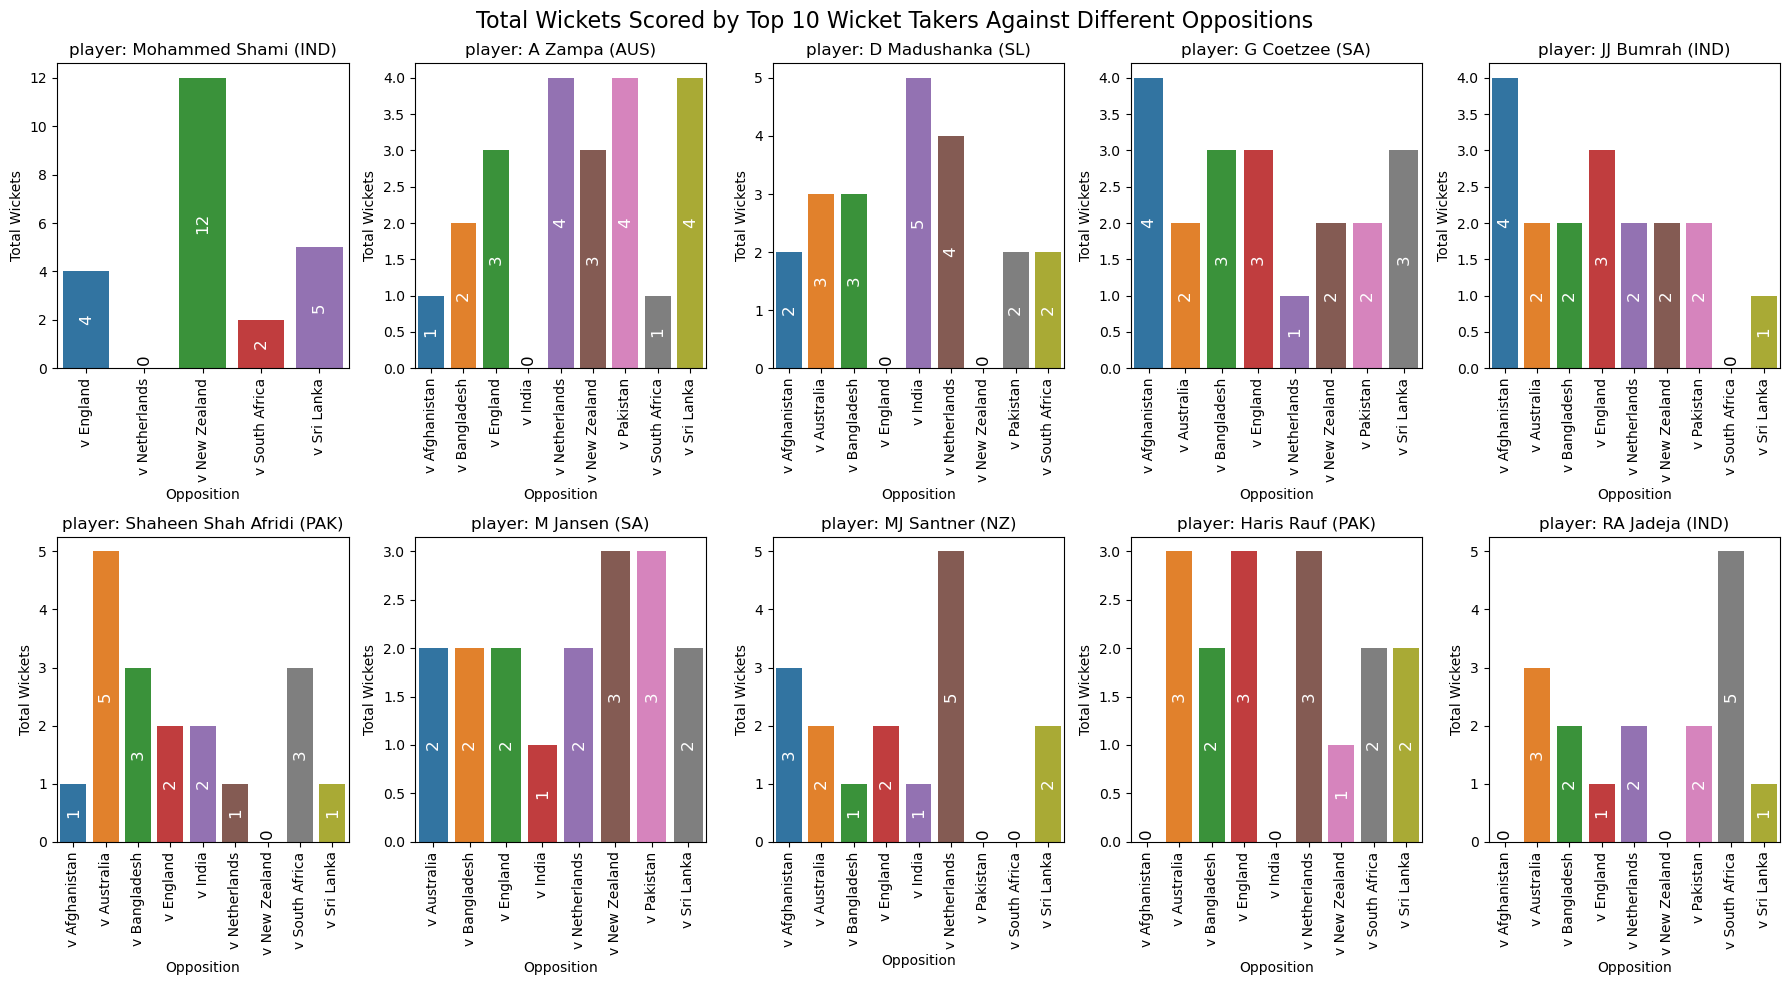

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Top 10 Wicket Takers Against Different Oppositions', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_wicket_takers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_opposition_stats[player_opposition_stats['player'] == player]
    ax = sns.barplot(x='opposition', y='wkts', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Opposition')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_top_10_wkts_takers_VS_each_opposition.png', dpi=1500)
plt.show()

In [43]:
#Opposition against which each of top 10 wicket takers scored highest wickets
max_player_wkts_df = player_opposition_stats.groupby('player').apply(lambda x: get_max_rows(x, 'wkts'))

# Reset index for better representation
max_player_wkts_df.reset_index(drop=True, inplace=True)
max_player_wkts_df = max_player_wkts_df[max_player_wkts_df['player'].isin(leading_wicket_takers.head(10).index)]
max_player_wkts_df.drop('runs', axis=1, inplace=True)
max_player_wkts_df.to_csv('Opposition against which each player (top 10) scored his highest wkts.csv')
max_player_wkts_df

,player,opposition,wkts
1,A Zampa (AUS),v Netherlands,4.0
2,A Zampa (AUS),v Pakistan,4.0
3,A Zampa (AUS),v Sri Lanka,4.0
68,D Madushanka (SL),v India,5.0
132,G Coetzee (SA),v Afghanistan,4.0
161,Haris Rauf (PAK),v Australia,3.0
162,Haris Rauf (PAK),v England,3.0
163,Haris Rauf (PAK),v Netherlands,3.0
212,JJ Bumrah (IND),v Afghanistan,4.0
273,M Jansen (SA),v New Zealand,3.0


In [44]:
#Team performance on each play ground
team_ground_stats = data.groupby(['team','ground']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
team_ground_stats.to_csv('team_ground_stats.csv')
team_ground_stats

,team,ground,runs,wkts
0,AFG,Ahmedabad,473,5.0
1,AFG,Chennai,973,13.0
2,AFG,Delhi,1005,12.0
3,AFG,Dharamsala,303,3.0
4,AFG,Lucknow,346,6.0
...,...,...,...,...
67,SL,Delhi,1274,12.0
68,SL,Hyderabad,675,4.0
69,SL,Lucknow,906,13.0
70,SL,Pune,471,3.0


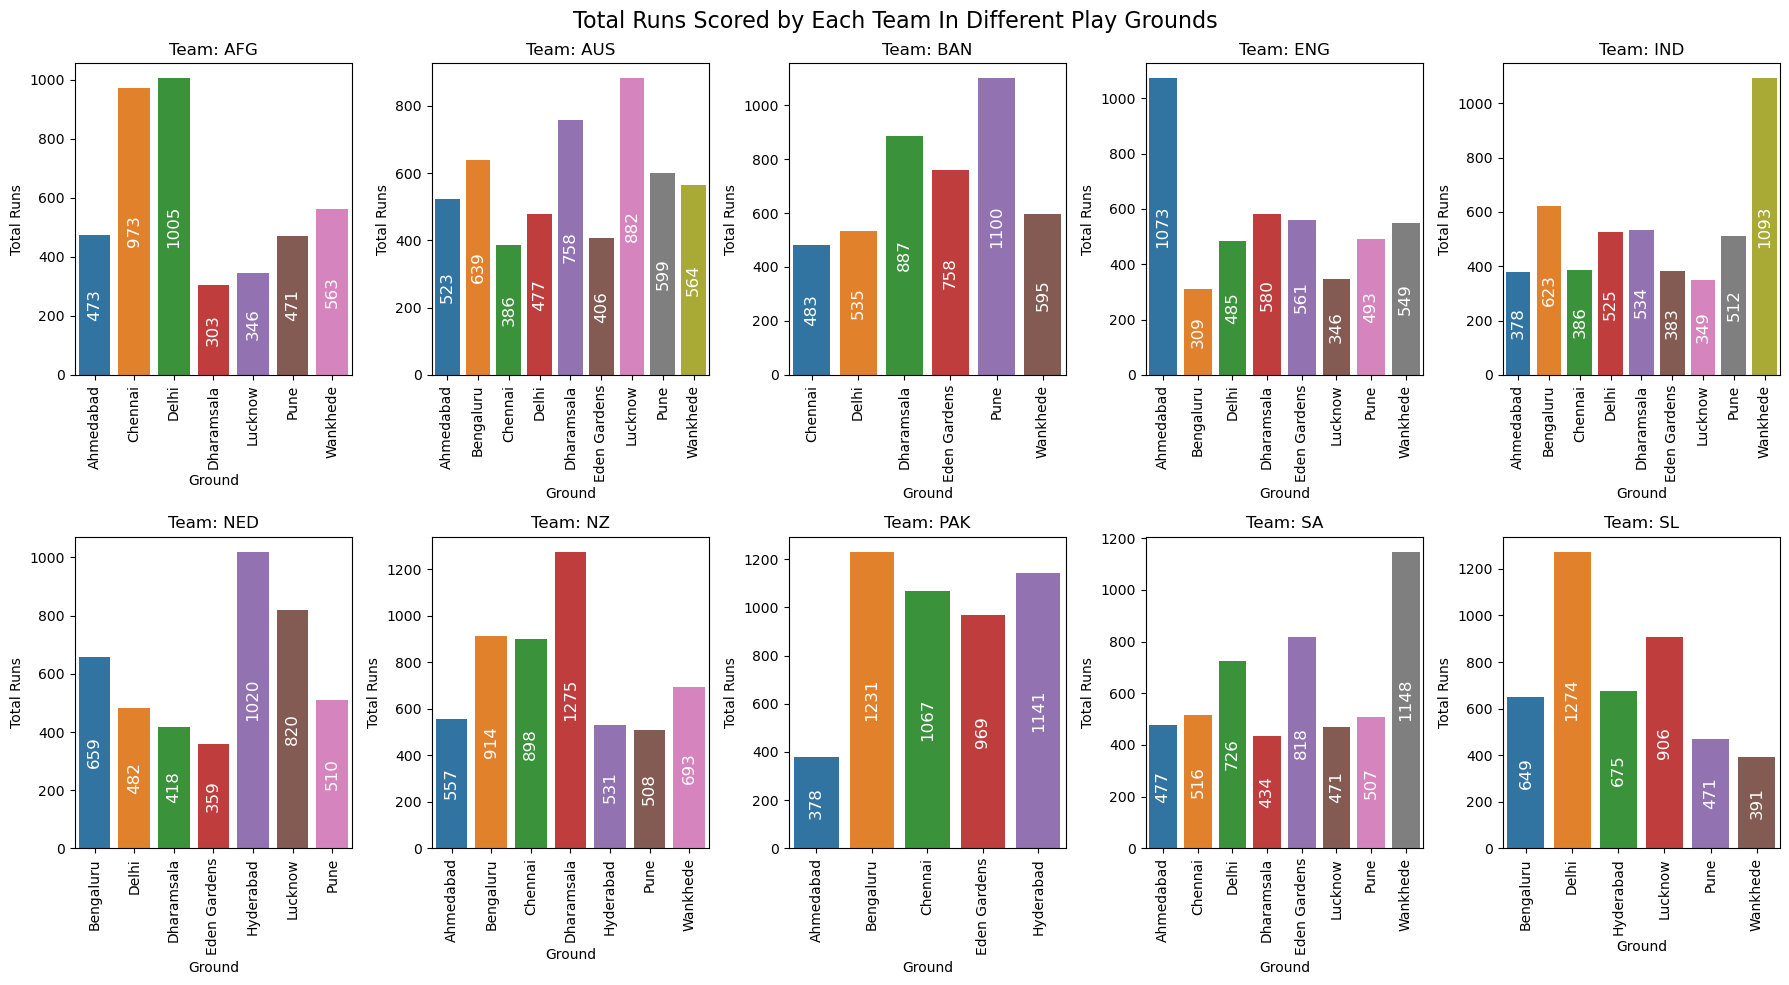

In [45]:
unique_teams = team_ground_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Each Team In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    ground_data = team_ground_stats[team_ground_stats['team'] == team]
    ax = sns.barplot(x='ground', y='runs', data=ground_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.2 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_each_team_in_each_ground.png', dpi=1500)
plt.show()

In [46]:
#Play ground on which each team scored the highest runs
max_team_ground_runs_df = team_ground_stats.groupby('team').apply(lambda x: get_max_rows(x, 'runs'))

# Reset index for better representation
max_team_ground_runs_df.reset_index(drop=True, inplace=True)
max_team_ground_runs_df.drop('wkts', axis=1, inplace=True)
max_team_ground_runs_df.to_csv('ground on which each team scored his highest runs.csv')
max_team_ground_runs_df

,team,ground,runs
0,AFG,Delhi,1005
1,AUS,Lucknow,882
2,BAN,Pune,1100
3,ENG,Ahmedabad,1073
4,IND,Wankhede,1093
5,NED,Hyderabad,1020
6,NZ,Dharamsala,1275
7,PAK,Bengaluru,1231
8,SA,Wankhede,1148
9,SL,Delhi,1274


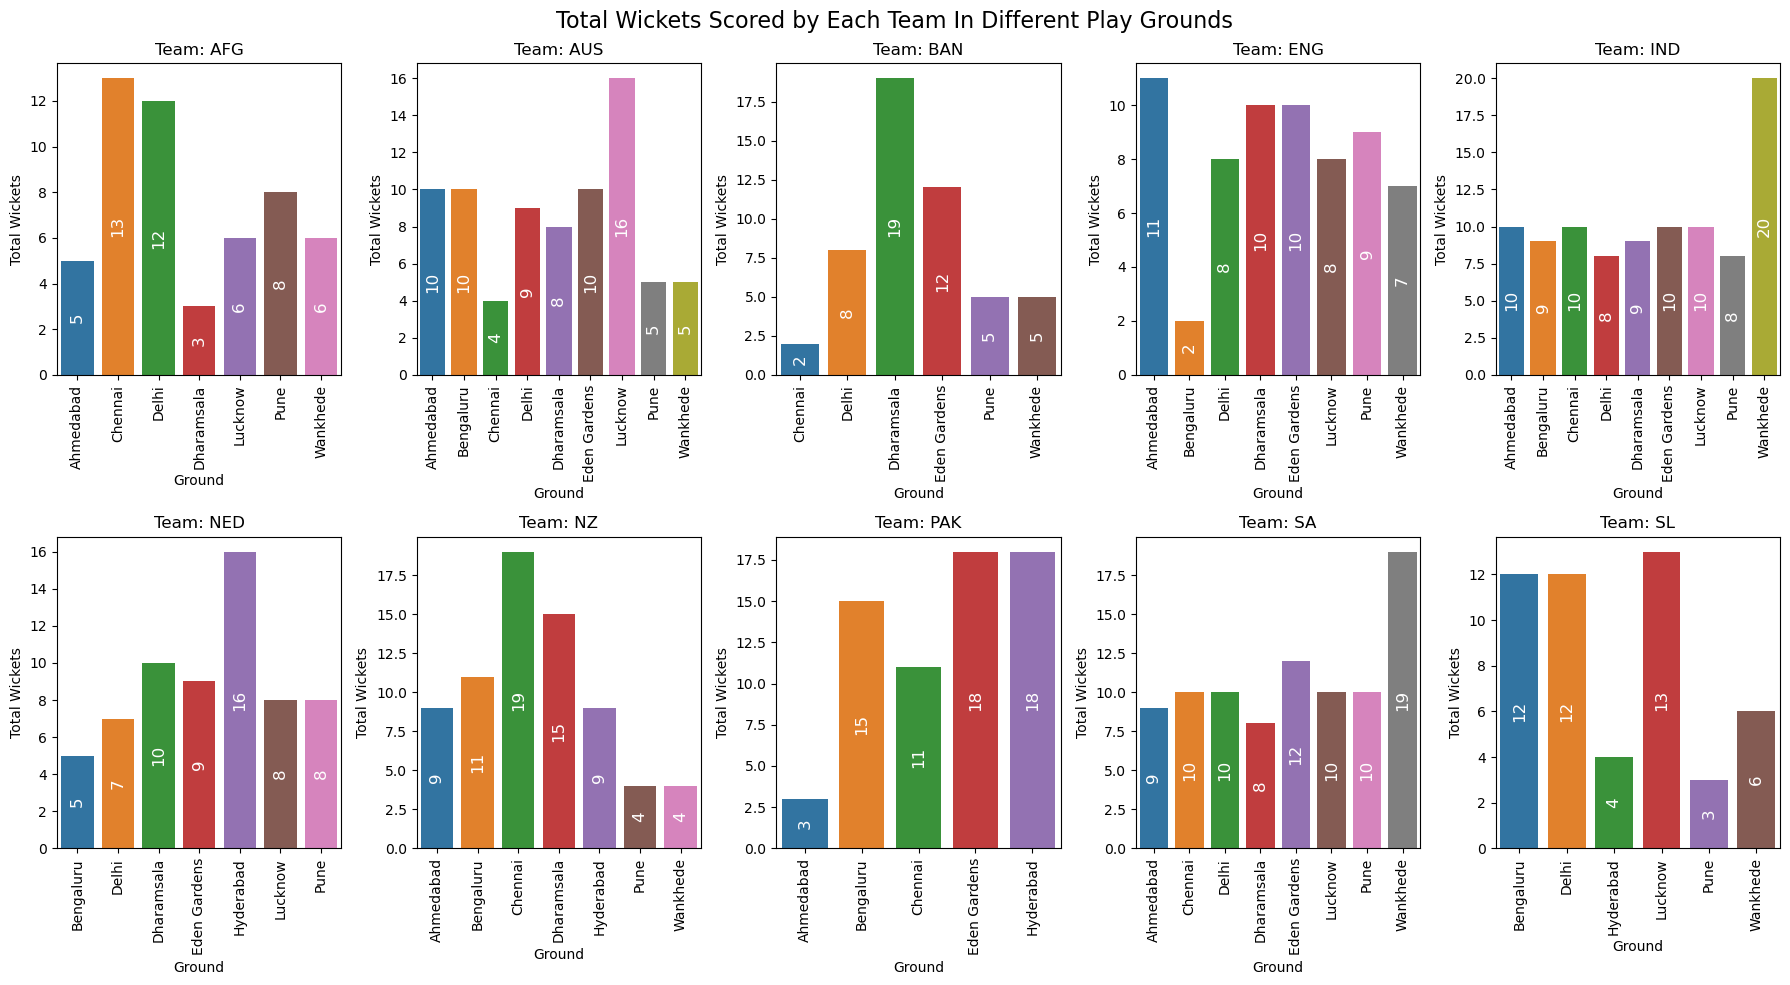

In [48]:
#Total wickets of each team in different play grounds
unique_teams = team_ground_stats['team'].unique()

# Create a subplot with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Each Team In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, team in enumerate(unique_teams):
    row, col = divmod(i, 5)
    ground_data = team_ground_stats[team_ground_stats['team'] == team]
    ax = sns.barplot(x='ground', y='wkts', data=ground_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'Team: {team}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_each_team_in_each_ground.png', dpi=1500)
plt.show()

In [49]:
#Play ground on which each team scored the highest wickets
max_team_ground_runs_df = team_ground_stats.groupby('team').apply(lambda x: get_max_rows(x, 'wkts'))

# Reset index for better representation
max_team_ground_runs_df.reset_index(drop=True, inplace=True)
max_team_ground_runs_df.drop('runs', axis=1, inplace=True)
max_team_ground_runs_df.to_csv('ground on which each team scored his highest wkts.csv')
max_team_ground_runs_df

,team,ground,wkts
0,AFG,Chennai,13.0
1,AUS,Lucknow,16.0
2,BAN,Dharamsala,19.0
3,ENG,Ahmedabad,11.0
4,IND,Wankhede,20.0
5,NED,Hyderabad,16.0
6,NZ,Chennai,19.0
7,PAK,Eden Gardens,18.0
8,PAK,Hyderabad,18.0
9,SA,Wankhede,19.0


In [50]:
#Players Performance (batting/bowling) on each play ground
player_ground_stats = data.groupby(['player','ground']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()
player_ground_stats.to_csv('player_ground_stats.csv')
player_ground_stats

,player,ground,runs,wkts
0,A Dutt (NED),Bengaluru,57,0.0
1,A Dutt (NED),Delhi,60,1.0
2,A Dutt (NED),Dharamsala,42,0.0
3,A Dutt (NED),Eden Gardens,35,1.0
4,A Dutt (NED),Hyderabad,122,3.0
...,...,...,...,...
810,WA Young (NZ),Ahmedabad,0,0.0
811,WA Young (NZ),Chennai,54,0.0
812,WA Young (NZ),Dharamsala,49,0.0
813,WA Young (NZ),Hyderabad,70,0.0


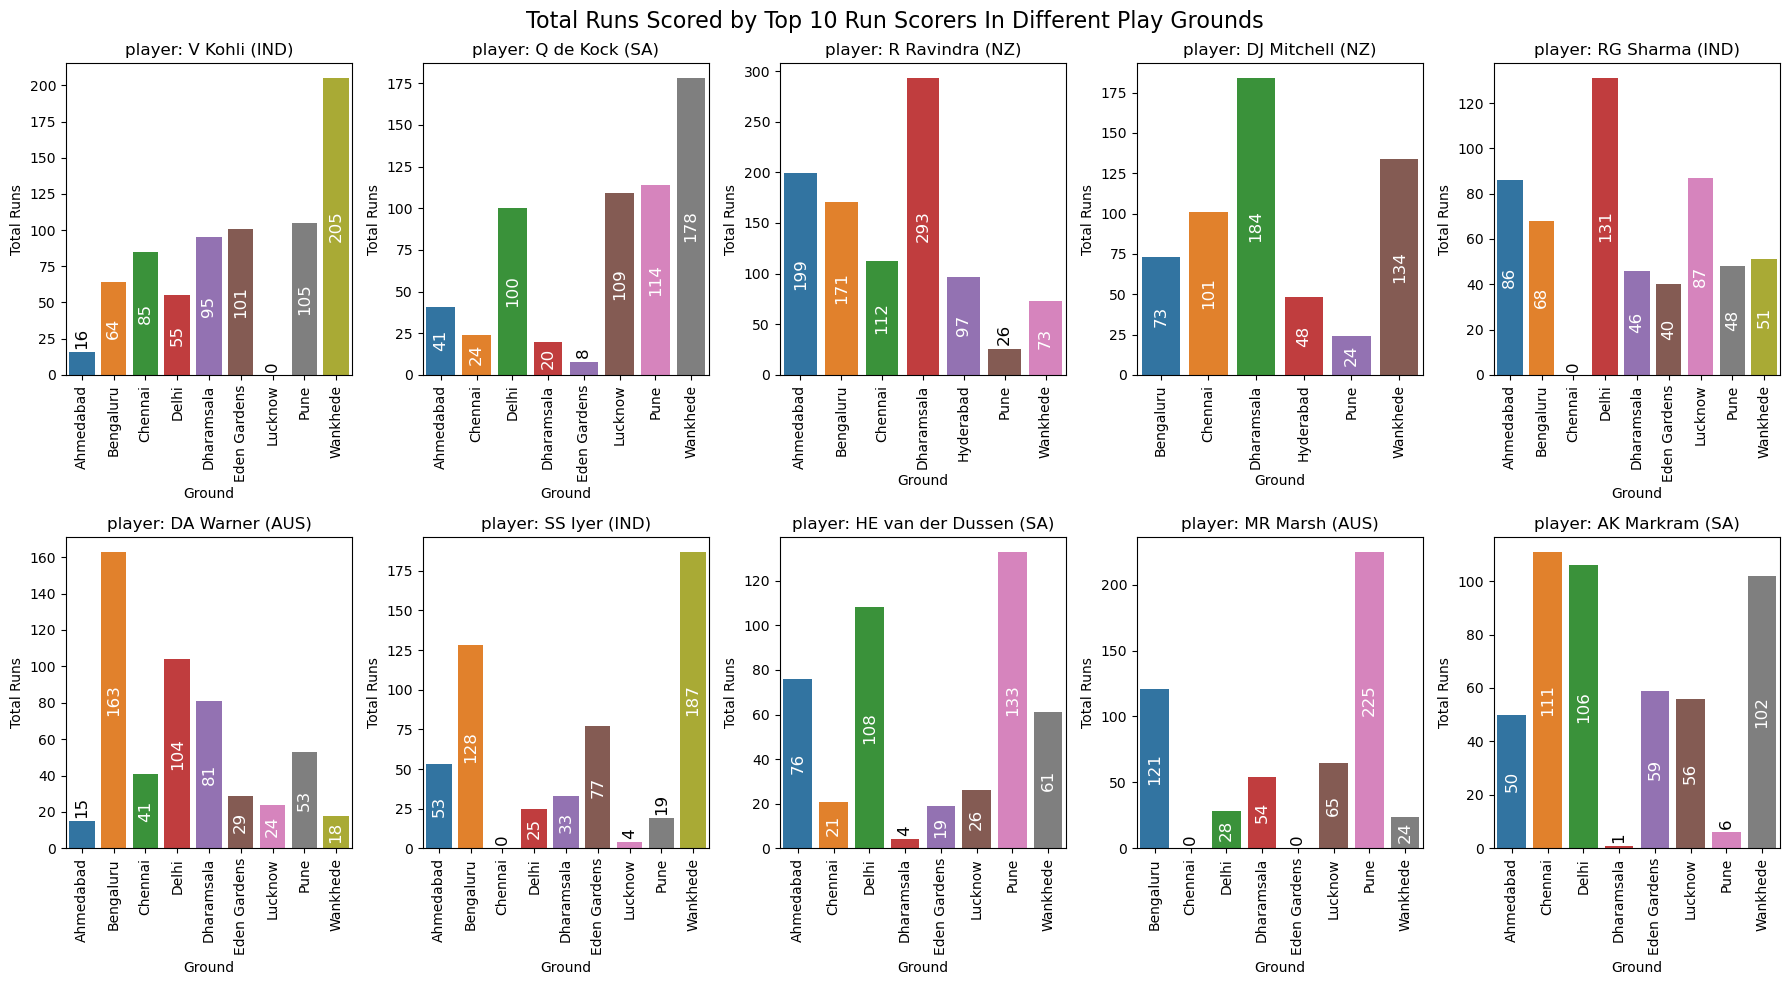

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Runs Scored by Top 10 Run Scorers In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_run_scorers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_ground_stats[player_ground_stats['player'] == player]
    ax = sns.barplot(x='ground', y='runs', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Runs')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_runs_of_top_10_run_scorers_in_each_ground.png', dpi=1500)
plt.show()

In [52]:
#Play ground on which each player (top 10) scored highest runs
max_player_ground_runs_df = player_ground_stats.groupby('player').apply(lambda x: get_max_rows(x, 'runs'))

# Reset index for better representation
max_player_ground_runs_df.reset_index(drop=True, inplace=True)
max_player_ground_runs_df = max_player_ground_runs_df[max_player_ground_runs_df['player'].isin(leading_run_scorers.head(10).index)]
max_player_ground_runs_df.drop('wkts', axis=1, inplace=True)
max_player_ground_runs_df.to_csv('ground on which each player (top 10) scored his highest runs.csv')
max_player_ground_runs_df

,player,ground,runs
4,AK Markram (SA),Chennai,111
24,DA Warner (AUS),Bengaluru,163
26,DJ Mitchell (NZ),Dharamsala,184
39,HE van der Dussen (SA),Pune,133
84,MR Marsh (AUS),Pune,225
108,Q de Kock (SA),Wankhede,178
111,R Ravindra (NZ),Dharamsala,293
114,RG Sharma (IND),Delhi,131
129,SS Iyer (IND),Wankhede,187
150,V Kohli (IND),Wankhede,205


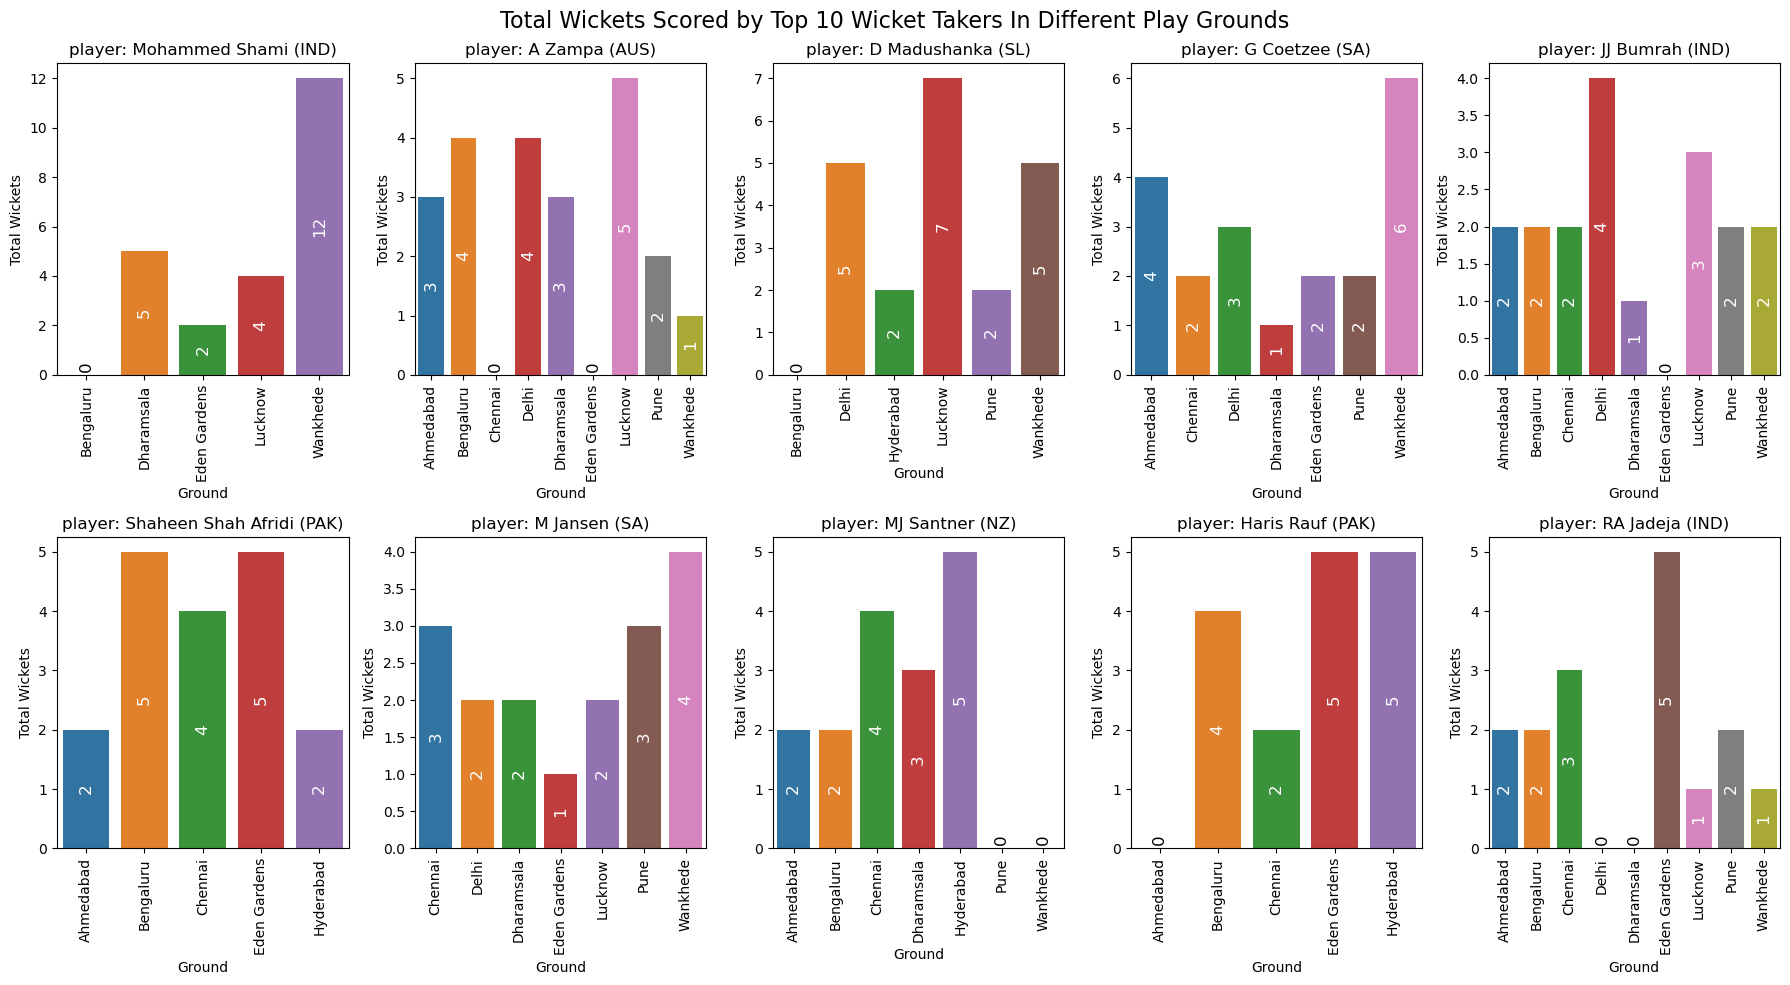

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))
fig.suptitle('Total Wickets Scored by Top 10 Wicket Takers In Different Play Grounds', fontsize=16)

# Iterate through unique team names and create bar plots
for i, player in enumerate(leading_wicket_takers.head(10).index):
    row, col = divmod(i, 5)
    player_data = player_ground_stats[player_ground_stats['player'] == player]
    ax = sns.barplot(x='ground', y='wkts', data=player_data, ax=axes[row, col])
    
    for p in ax.patches:
        height = p.get_height()
        if height < 0.1 * ax.get_ylim()[1]:
            ax.text(p.get_x() + p.get_width() / 2., height +0.01 * ax.get_ylim()[1] , f'{int(height)}', ha="center", va="bottom", color="k", fontsize=12, rotation =90)
        else:
            ax.text(p.get_x() + p.get_width() / 2., height / 2, f'{int(height)}', ha="center", va="center", color="white", fontsize=12,rotation=90 )

    axes[row, col].set_title(f'player: {player}')
    axes[row, col].set_ylabel('Total Wickets')
    axes[row, col].set_xlabel('Ground')
    axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('Total_wkts_of_top_10_wkts_takers_in_each_ground.png', dpi=1500)
plt.show()

In [54]:
#Play grounds on which each player (top 10) scored highest wickets
max_player_ground_wkts_df = player_ground_stats.groupby('player').apply(lambda x: get_max_rows(x, 'wkts'))

# Reset index for better representation
max_player_ground_wkts_df.reset_index(drop=True, inplace=True)
max_player_ground_wkts_df = max_player_ground_wkts_df[max_player_ground_wkts_df['player'].isin(leading_wicket_takers.head(10).index)]
max_player_ground_wkts_df.drop('runs', axis=1, inplace=True)
max_player_ground_wkts_df.to_csv('ground on which each player (top 10) scored his highest wkts.csv')
max_player_ground_wkts_df 

,player,ground,wkts
2,A Zampa (AUS),Lucknow,5.0
52,D Madushanka (SL),Lucknow,7.0
106,G Coetzee (SA),Wankhede,6.0
133,Haris Rauf (PAK),Eden Gardens,5.0
134,Haris Rauf (PAK),Hyderabad,5.0
173,JJ Bumrah (IND),Delhi,4.0
231,M Jansen (SA),Wankhede,4.0
258,MJ Santner (NZ),Hyderabad,5.0
291,Mohammed Shami (IND),Wankhede,12.0
335,RA Jadeja (IND),Eden Gardens,5.0


# Temporal analysis

C:\Users\BEST BUY\AppData\Local\Temp\ipykernel_31380\2053087779.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


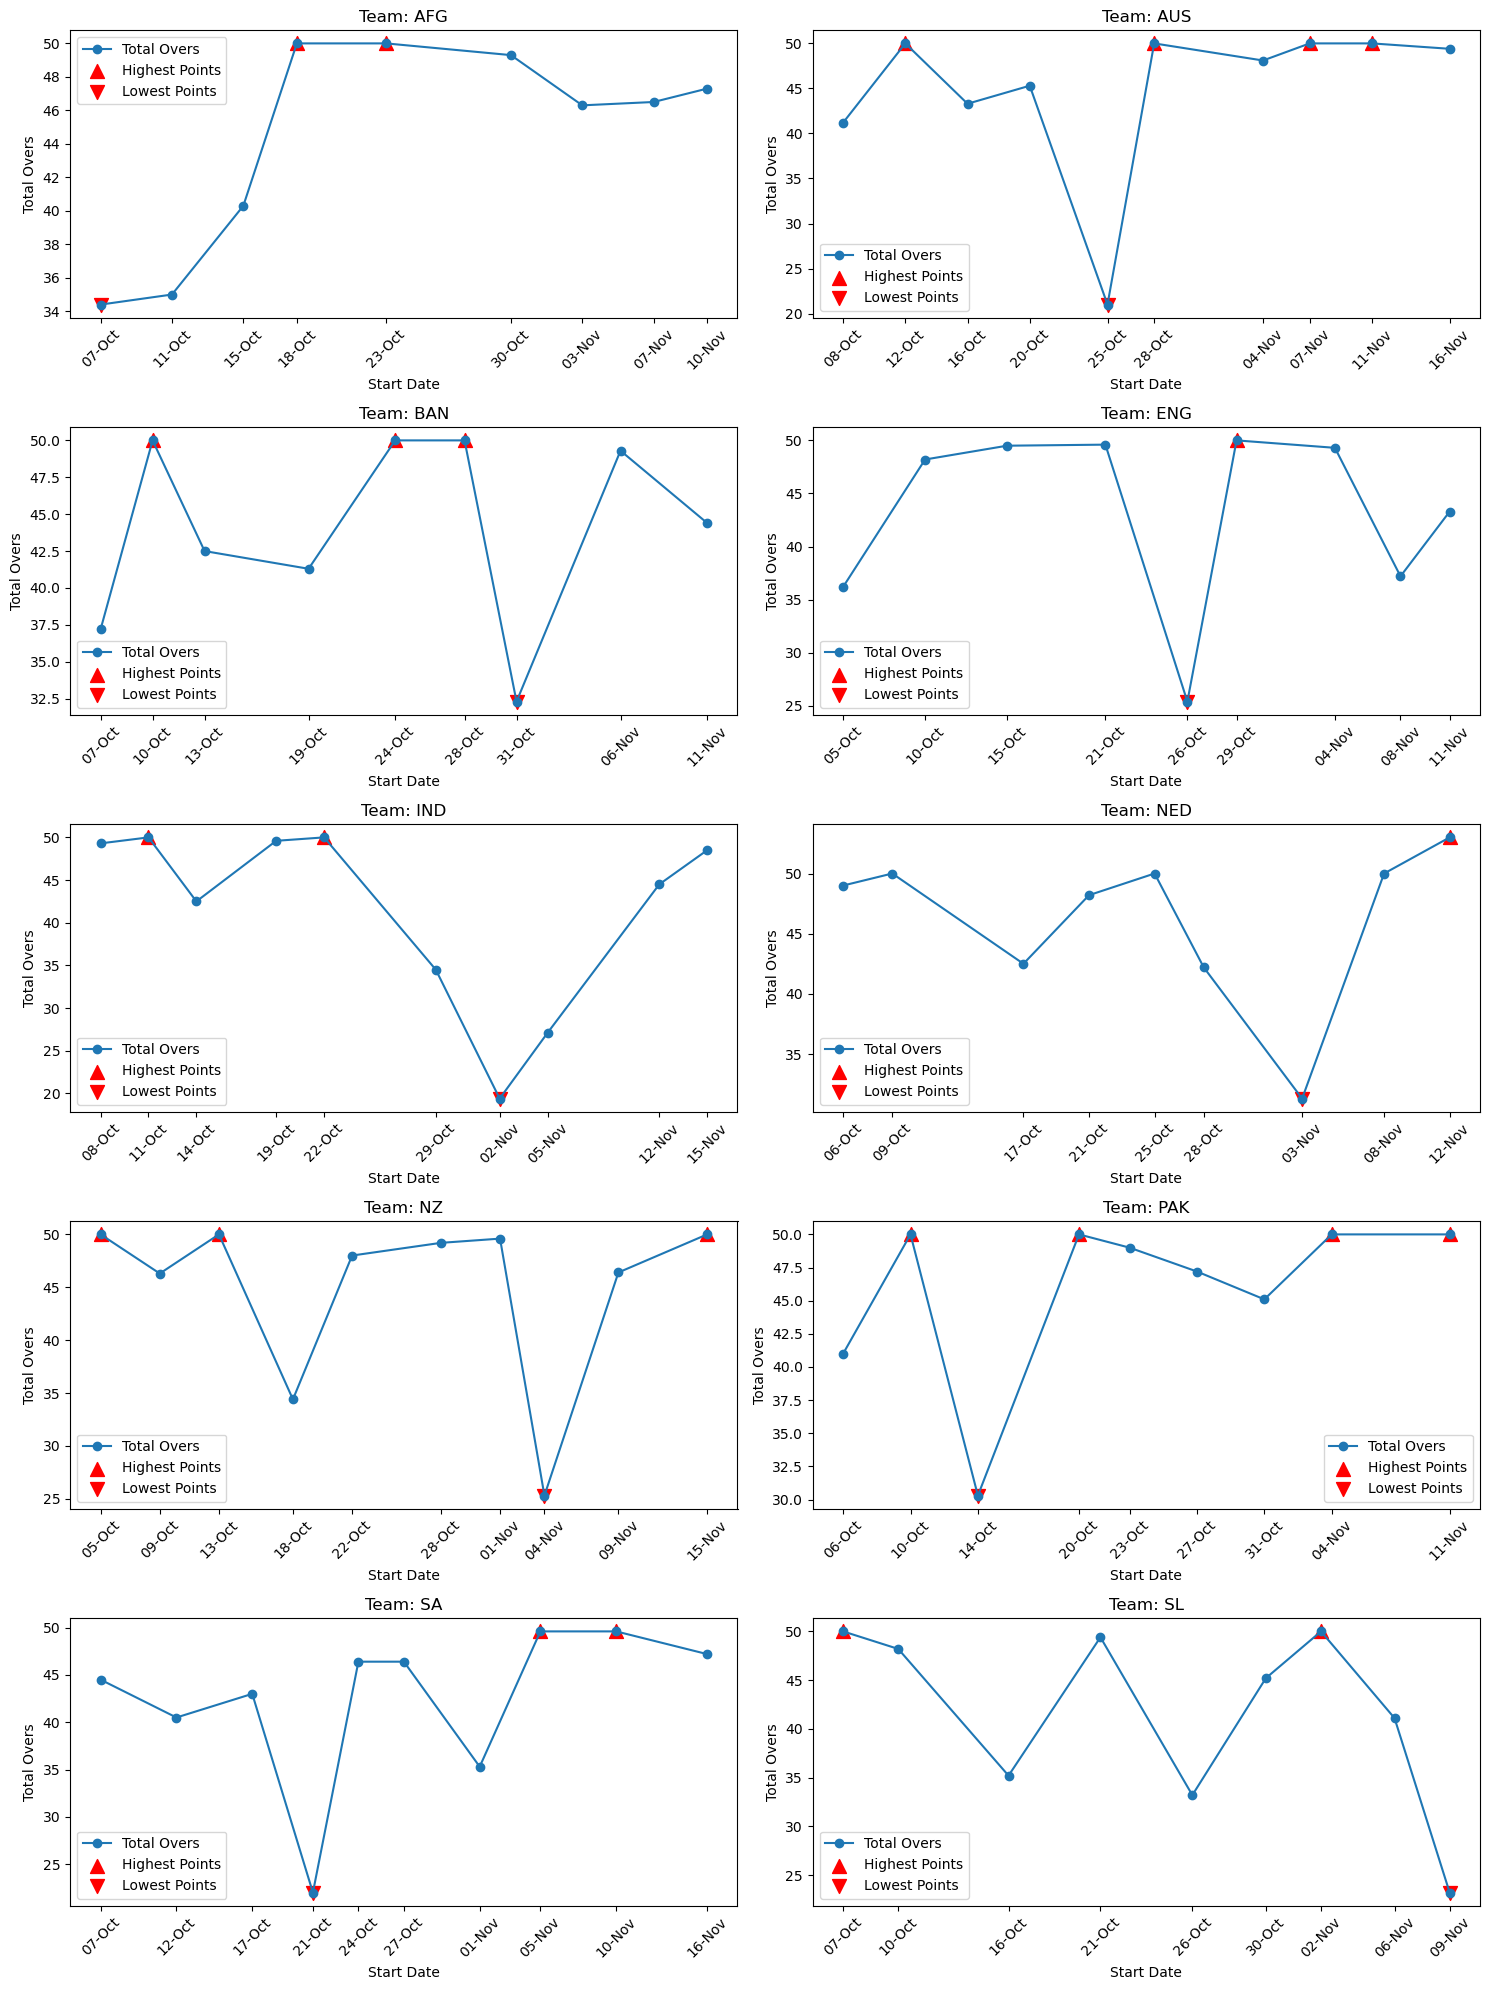

In [56]:
# Total overs for each team over time
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['team', 'start_date']).agg({
    'overs': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
teams = df['team'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, team in enumerate(teams):
    team_data = df[df['team'] == team]
    
    # Plot line with markers for each team
    axes[i].plot(team_data['start_date'], team_data['overs'], marker='o', label='Total Overs')
    
    # Highlight all highest and lowest points with red markers
    max_points = team_data[team_data['overs'] == team_data['overs'].max()]
    min_points = team_data[team_data['overs'] == team_data['overs'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['overs'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['overs'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Overs')
    axes[i].set_title(f'Team: {team}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(team_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total overs for each team over time.png', dpi=900)
plt.show()

C:\Users\BEST BUY\AppData\Local\Temp\ipykernel_31380\775453236.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


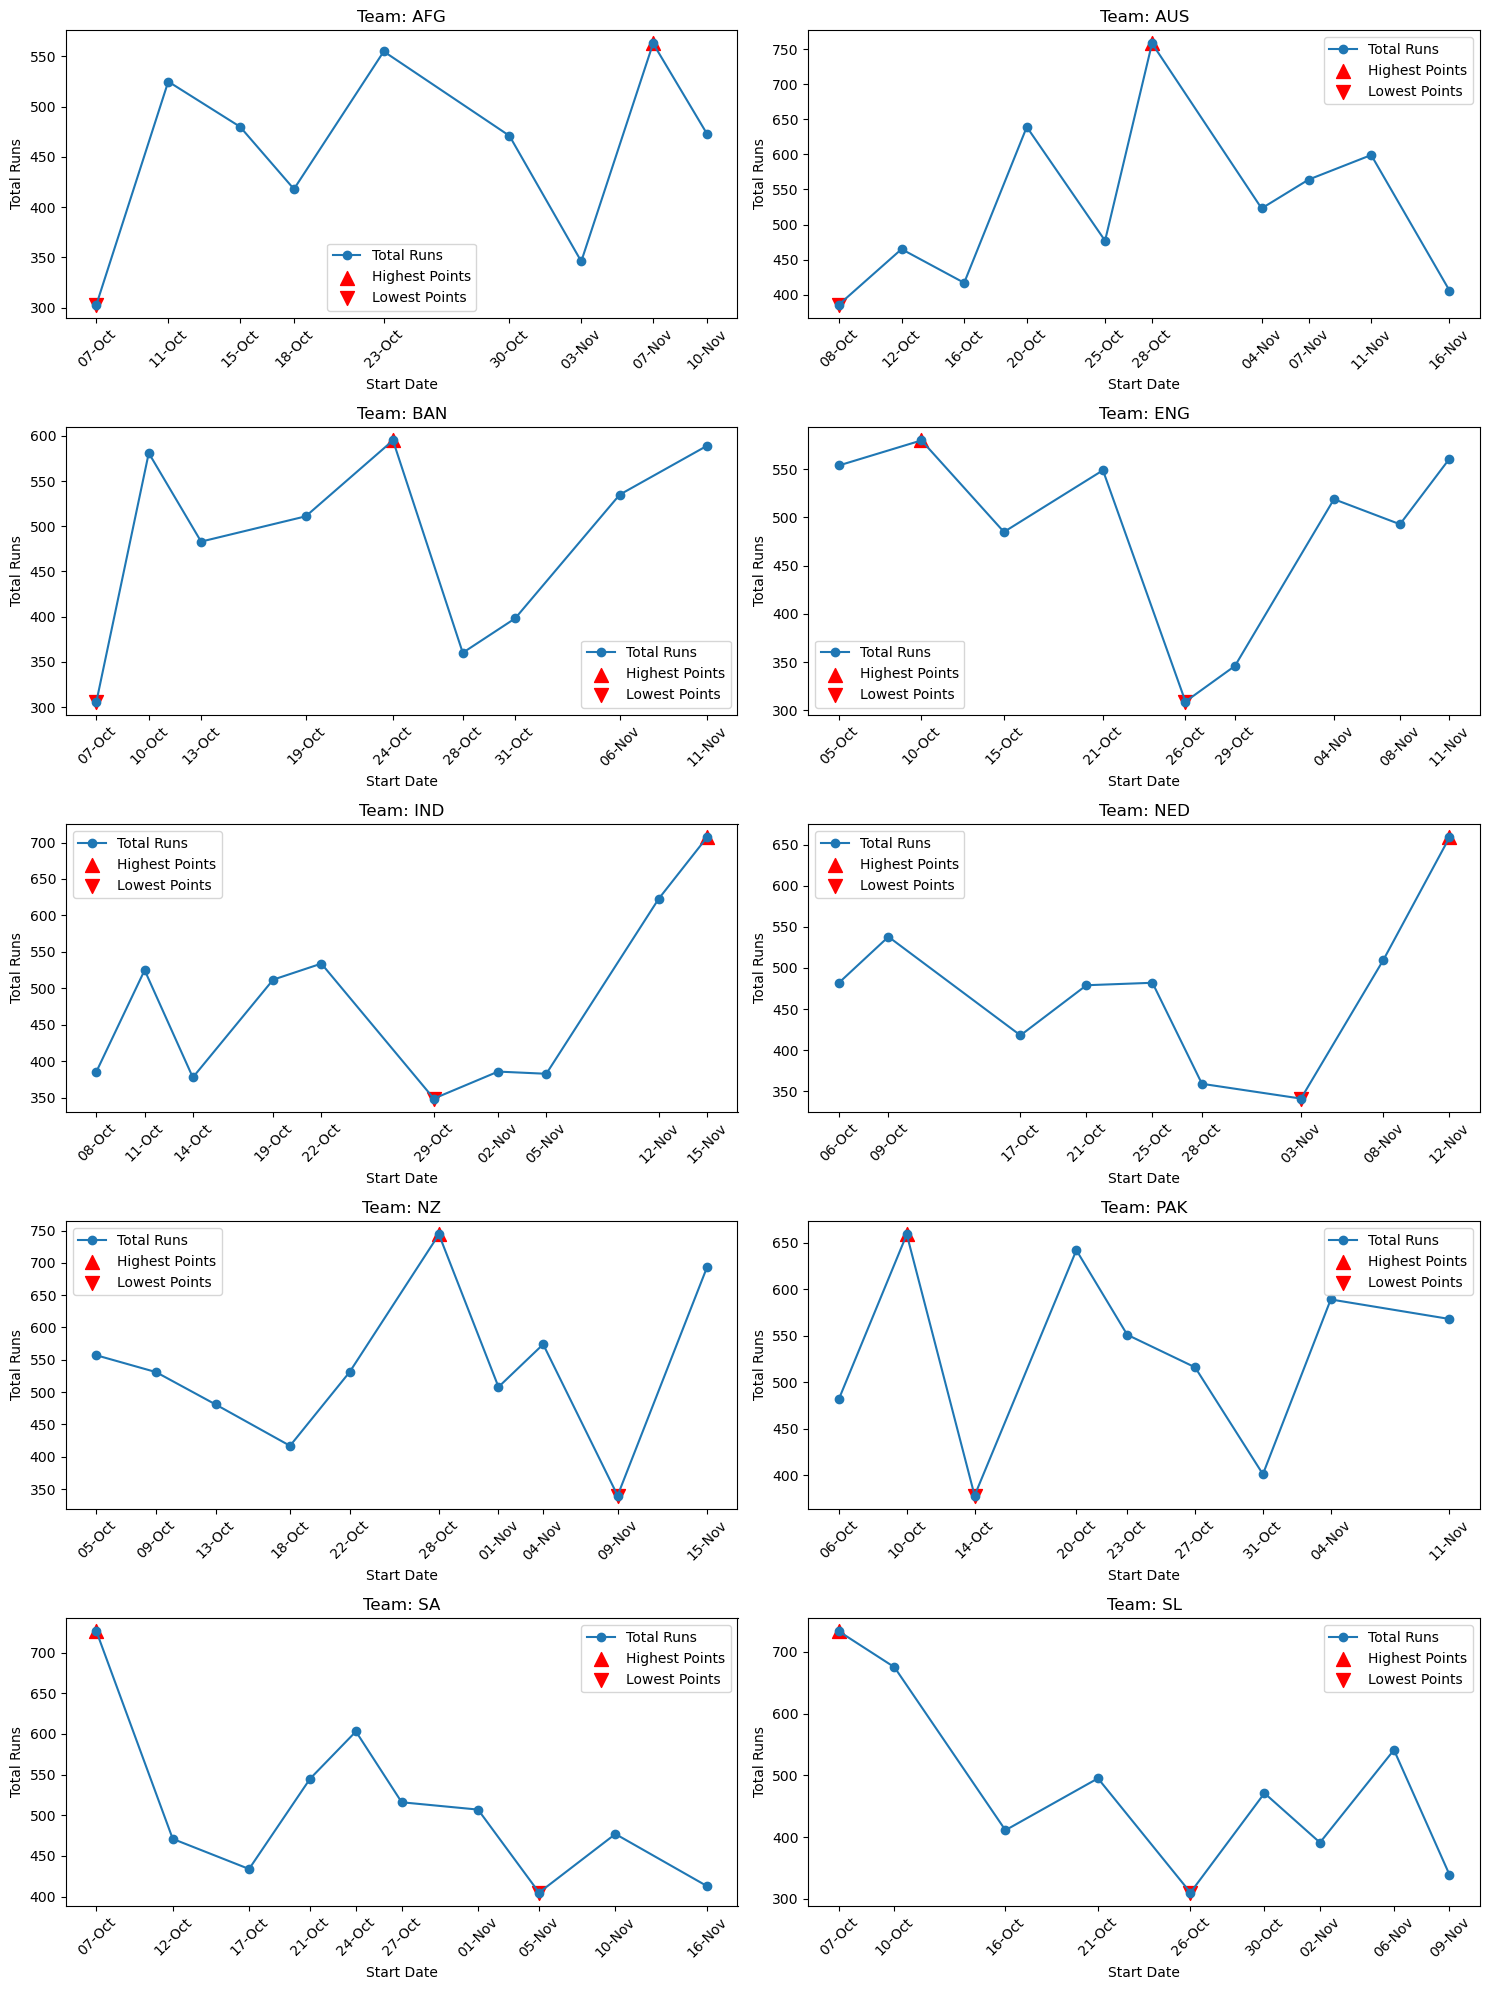

In [57]:
#Total runs for each team over time¶
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['team', 'start_date']).agg({
    'runs': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
teams = df['team'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()
# Iterate through each team and plot the line plot
for i, team in enumerate(teams):
    team_data = df[df['team'] == team]
    
    # Plot line with markers for each team
    axes[i].plot(team_data['start_date'], team_data['runs'], marker='o', label='Total Runs')
    
    # Highlight all highest and lowest points with red markers
    max_points = team_data[team_data['runs'] == team_data['runs'].max()]
    min_points = team_data[team_data['runs'] == team_data['runs'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['runs'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['runs'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Runs')
    axes[i].set_title(f'Team: {team}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(team_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total runs for each team over time.png', dpi=900)
# Show the plot
plt.show()

C:\Users\BEST BUY\AppData\Local\Temp\ipykernel_31380\2116946730.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


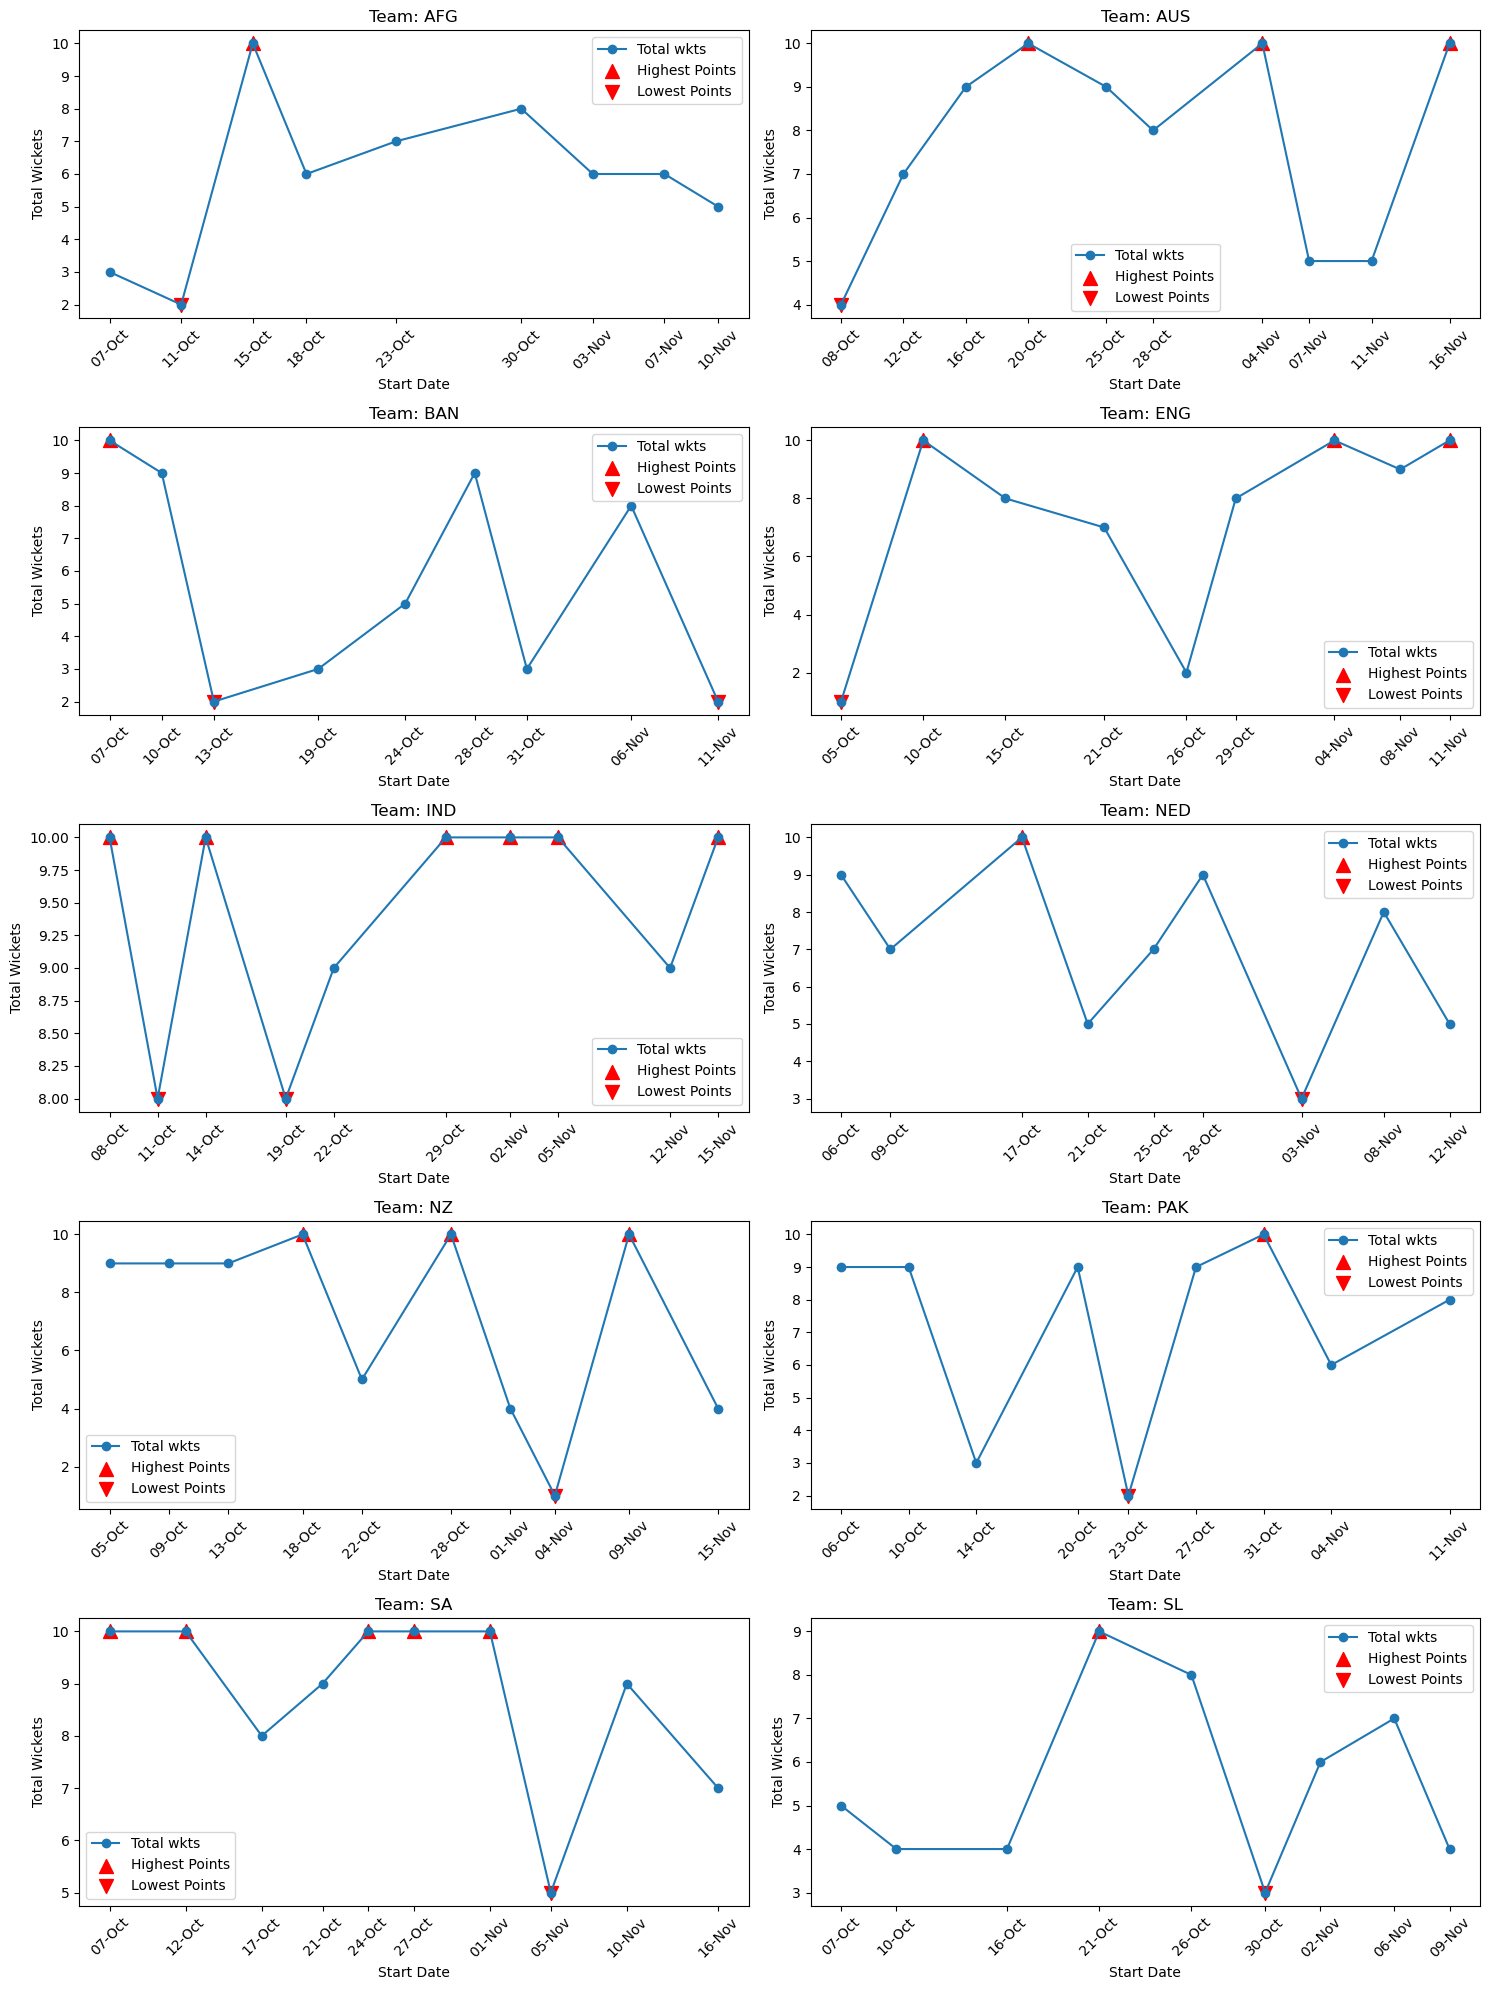

In [58]:
#Total wickets for each team over time
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['team', 'start_date']).agg({
    'wkts': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
teams = df['team'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, team in enumerate(teams):
    team_data = df[df['team'] == team]
    # Plot line with markers for each team
    axes[i].plot(team_data['start_date'], team_data['wkts'], marker='o', label='Total wkts')
    
    # Highlight all highest and lowest points with red markers
    max_points = team_data[team_data['wkts'] == team_data['wkts'].max()]
    min_points = team_data[team_data['wkts'] == team_data['wkts'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['wkts'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['wkts'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Wickets')
    axes[i].set_title(f'Team: {team}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(team_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total wickets for each team over time.png', dpi=900)
plt.show()

# Player performance over time

C:\Users\BEST BUY\AppData\Local\Temp\ipykernel_31380\596406280.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


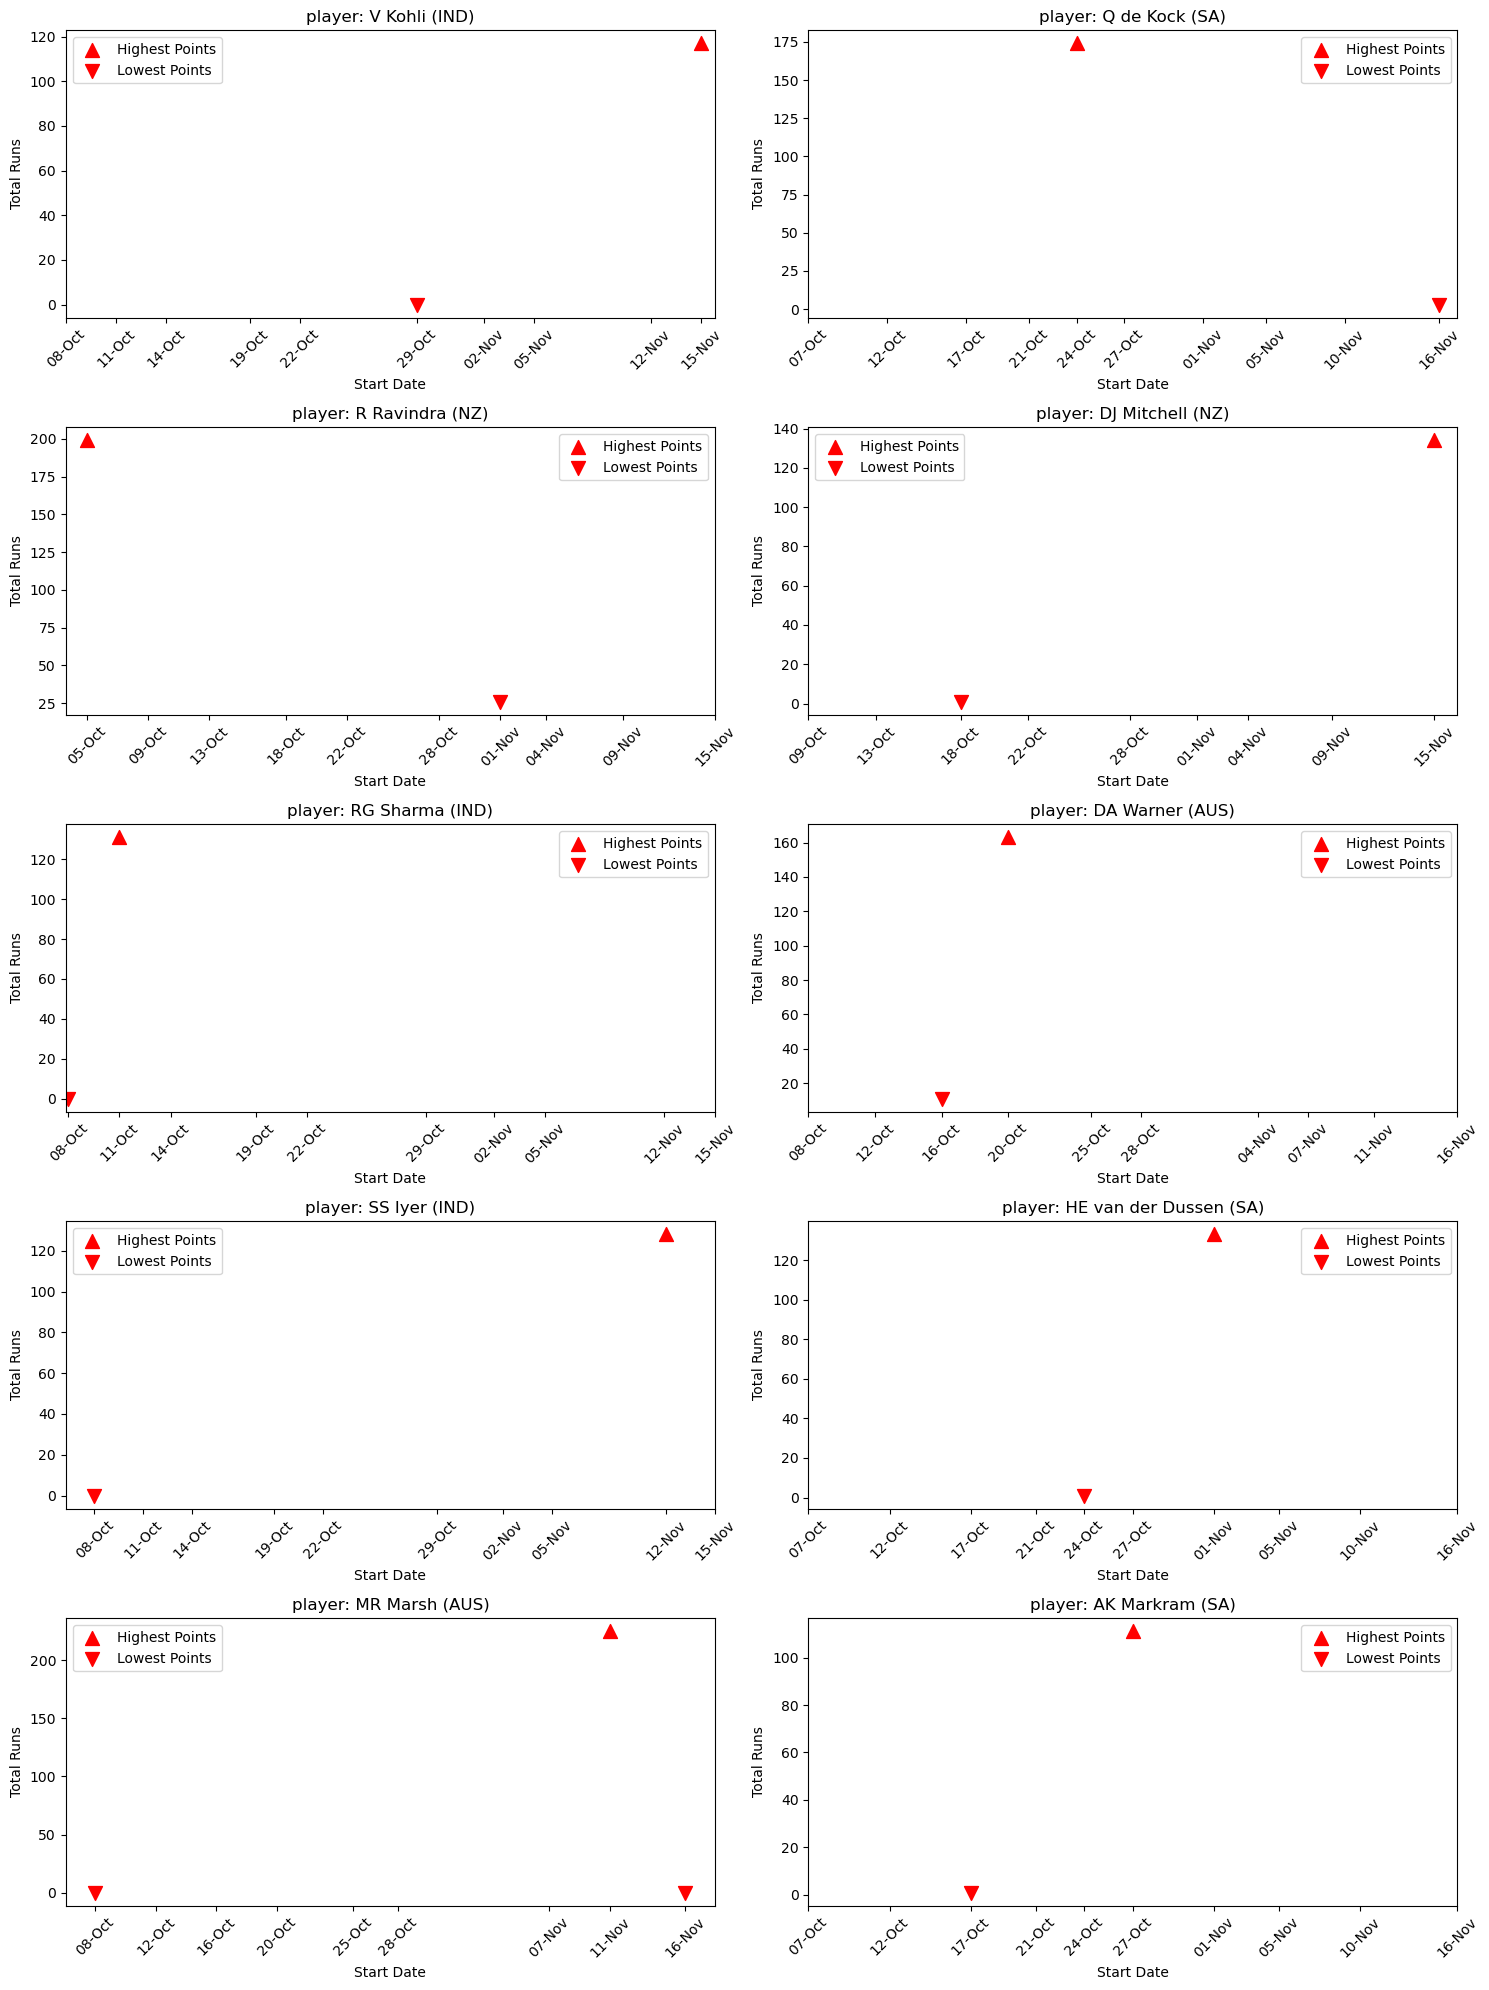

In [62]:
#Total runs of each batting player (top 10) over time
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['player', 'start_date']).agg({'runs': 'sum'}).reset_index()

# Get unique teams from the 'team' column
players = df['player'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, player in enumerate(leading_run_scorers.head(10).index):
    player_data = df[df['player'] == player]
    
    # Plot line with markers for each team
    # Highlight all highest and lowest points with red markers
    max_points = player_data[player_data['runs'] == player_data['runs'].max()]
    min_points = player_data[player_data['runs'] == player_data['runs'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['runs'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['runs'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Runs')
    axes[i].set_title(f'player: {player}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(player_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total runs for each batting player (top 10) over time.png', dpi=900)
# Show the plot
plt.show()

In [ ]:
#Total wickets for each bowling player (top 10) over time
df = data.copy()
df['start_date'] = pd.to_datetime(df['start_date'])

df = df.groupby(['player', 'start_date']).agg({
    'wkts': 'sum'
}).reset_index()

# Get unique teams from the 'team' column
players = df['player'].unique()

# Create a 5*2 subplot
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the 5*2 subplot array for easy iteration
axes = axes.flatten()

# Iterate through each team and plot the line plot
for i, player in enumerate(leading_wicket_takers.head(10).index):
    player_data = df[df['player'] == player]
    
    # Plot line with markers for each team
    axes[i].plot(player_data['start_date'], player_data['wkts'], marker='o', label='Total wkts')
    # Highlight all highest and lowest points with red markers
    max_points = player_data[player_data['wkts'] == player_data['wkts'].max()]
    min_points = player_data[player_data['wkts'] == player_data['wkts'].min()]
    
    axes[i].scatter(max_points['start_date'], max_points['wkts'], color='red', marker='^', s=100, label='Highest Points')
    axes[i].scatter(min_points['start_date'], min_points['wkts'], color='red', marker='v', s=100, label='Lowest Points')
    
    # Set labels and title
    axes[i].set_xlabel('Start Date')
    axes[i].set_ylabel('Total Wickets')
    axes[i].set_title(f'player: {player}')
    
    # Format x-axis ticks to show day and abbreviated month
    axes[i].set_xticks(sorted(player_data['start_date']))
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%b'))
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Display legend
    axes[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Total wkts for each bowling player (top 10) over time.png', dpi=900)
plt.show()

C:\Users\BEST BUY\AppData\Local\Temp\ipykernel_31380\2203484080.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])
